# EDA - EXPLORAR AS OFERTAS RELÂMPAGO

* [1. Carregando Pacotes e Fazendo Especificações](#chapter1)
* [2. Importar e Entender os Dados](#chapter2)
    * [2.1. Conhecendo as variáveis Disponíveis](#section_2_1)
    * [2.2. Shapes e Dimensões do DataFrame](#section_2_2)
    * [2.3. Analisando os Valores Nulos](#section_2_3)
    * [2.4. Criando novas variáveis](#section_2_4)
        * [2.4.1.Duração da Oferta](#section_2_4_1)
        * [2.4.2 Valor do Produto](#section_2_4_2)
        * [2.4.3. Fração de Produtos Vendidos](#section_2_4_3)
* [3. Análise Exploratória dos Dados (EDA)](#chapter3)
    * [3.1. OFFER_START_DATE e OFFER_START_DTTM](#section_3_1)
    * [3.2. OFFER_FINISH_DTTM](#section_3_2)
    * [3.3. OFFER_TYPE](#section_3_3)
    * [3.4. INVOLVED_STOCK](#section_3_4)
    * [3.5. REMAINING STOCK AFTER END](#section_3_5)
    * [3.6. SOLD_AMOUNT](#section_3_6)
    * [3.7. SOLD_QUANTITY](#section_3_7)
    * [3.8. ORIGIN](#section_3_8)
    * [3.9. SHIPPING_PAYMENT_TYPE](#section_3_9)
    * [3.10. DOM_DOMAIN_AGG1](#section_3_10)
    * [3.11. OFFER_DURATION](#section_3_11)
    * [3.12. PRODUCT_VALUE](#section_3_12)
    * [3.13. FRACTION_PRODUCTS_SOLD](#section_3_13)
* [4. ANALISANDO RELAÇÕES ENTRE VARIÁVEIS](#chapter4)
    * [4.1. Relação entre Tempo de Duração da Oferta x Fração de Produtos Vendidos](#section_4_1)
    * [4.2. Shipping Payment Type e o Desempenho de Vendas](#section_4_2)
* [5. Agrupando as variáveis numéricas pelas categorias de produtos](#chapter5)
    * [5.1. VERTICAL](#section_5_1)
        * [5.1.1. DESCRIÇÃO RESUMO DE VERTICAL](#section_5_1_1)
        * [5.1.2. Estoque por Categorias - Antes e Após as promoções](#section_5_1_2)
        * [5.1.3. Quais categorias de Vertical tiveram maior volume de vendas?](#section_5_1_3)
        * [5.1.4. Analisando em conjunto as quatro variáveis](#section_5_1_4)
        * [5.1.5. Estimativa do valor dos produtos por Categoria (Vertical)](#section_5_1_5)
    * [5.2 DOM_DOMAIN_AGG1 (Explorando a classe BEAUTY & HEALTH)](#section_5_2)
        * [5.2.1. Qual Produto foi mais bem sucedido? ](#section_5_2_1)
* [6. Insights Gerados a partir das Análises Exploratórias](#chapter6)

# 1. Carregando Pacotes e Fazendo Especificações <a class="anchor" id="chapter1"></a>

In [1]:
import numpy as np 
import pandas as pd 
import csv
from datetime import datetime

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from IPython.display import display_html 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import scipy.stats as norm

Definindo tamanho padrão dos gráficos

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

DEFININDO O DIRETORIO DE TRABALHO

In [5]:
import os
os.chdir('/Users/brunnokalyxton/Desktop/Data Science/13 - Mercado Livre/Desafio ds 2022')
os.getcwd()

'/Users/brunnokalyxton/Desktop/Data Science/13 - Mercado Livre/Desafio ds 2022'

# 2. Importar e Entender os Dados <a class="anchor" id="chapter2"></a>

In [6]:
df= pd.read_csv("ofertas_relampago.csv")
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


## 2.1. Conhecendo as variáveis Disponíveis <a class="anchor" id="section_2_1"></a>

* OFFER_START_DATE = Data de início da oferta
* OFFER_START_DTTM = Data de início da oferta (com horário)
* OFFER_FINISH_DTTM = Data de término da oferta (com horário)
* OFFER_TYPE = Tipo da oferta (100% é Oferta Relâmpago)
* INVOLVED_STOCK = Estoque disponível do produto no início da oferta
* REMAINING_STOCK_AFTER_END = Estoque remanescente após término da oferta
* SOLD_AMOUNT = Valor financeiro vendido do produto
* SOLD_QUANTITY = Quantidade vendida do produto
* ORIGIN = Origem do produto (Todos estão como A ou com valor missing)
* SHIPPING_PAYMENT_TYPE = tipo de entrega e pagamento (Aproximadamente metade free_shing e a outra metade "Sem informação")
* DOM_DOMAIN_AGG1 = Sub categoria do produto
* VERTICAL = Categoria do Produto
* DOMAIN_ID = Sub-sub Categoria do produto

Obs: todas as definições foram obtidas utilzando value_counts()

## 2.2. Shapes e Dimensões do DataFrame <a class="anchor" id="section_2_2"></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [8]:
df.shape

(48746, 13)

Verificando se há valores nulos

In [9]:
print(df.isnull().sum())

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


## 2.3. Analisando os Valores Nulos <a class="anchor" id="section_2_3"></a>

In [10]:
df.head(100)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS


In [11]:
df.groupby(df['DOM_DOMAIN_AGG1']).mean()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
DOM_DOMAIN_AGG1,,,,
ACC TOOLS,9.947368,8.221053,17.634107,3.053571
AGRO,10.000000,10.000000,NaN,NaN
ANTIQUES & HOBBIES,7.000000,5.000000,37.933333,3.333333
APPAREL,23.994295,22.121110,18.423123,3.952141
APPAREL ACCESORIES,13.901983,12.267837,17.354357,3.632653
AUTOPARTS,9.850236,7.563679,16.525111,4.286031
BABY,22.275905,21.394507,25.632529,2.321839
BATTERIES,7.609524,5.885714,5.712745,3.588235
BEAUTY EQUIPMENT,157.095541,135.851683,128.553184,35.166425


Analisando as linhas em que há valores nulos nas variáveis SOLD_AMOUNT e SOLD_QUANTITY verifica-se o padrão de que ele só ocorre quando o estoque inicial (INVOLVED_STOCK) e final da oferta (REMAINING_STOCK_AFTER_END) são iguais, ou seja, não houveram vendas do produto durante a oferta relâmpago. Por este motivo irei imputar o valor 0 em todos os casos.

Já o caso da variável ORIGIN, não há registro de nenhuma outra origem do produto e também não há aparente relação com as demais variáveis dispoíveis. Por este motivo imputarei esta variável com a palavra "UNKNOWN"

In [12]:
df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)

In [13]:
df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)

In [14]:
df['ORIGIN'] = df['ORIGIN'].fillna("UNKNOWN")

In [15]:
print(df.isnull().sum())

OFFER_START_DATE             0
OFFER_START_DTTM             0
OFFER_FINISH_DTTM            0
OFFER_TYPE                   0
INVOLVED_STOCK               0
REMAINING_STOCK_AFTER_END    0
SOLD_AMOUNT                  0
SOLD_QUANTITY                0
ORIGIN                       0
SHIPPING_PAYMENT_TYPE        0
DOM_DOMAIN_AGG1              0
VERTICAL                     0
DOMAIN_ID                    0
dtype: int64


## 2.4. Criando novas variáveis <a class="anchor" id="section_2_4"></a>

A partir da exploração inicial das variáveis, verificou-se a possibilidade de criação de outras variáveis por meio de equações das já existentes, para que a análise exploratória seja mais abrangente.

### 2.4.1 Duração da Oferta <a class="anchor" id="section_2_4_1"></a>

In [16]:
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'], errors='coerce')
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'], errors='coerce')

In [17]:
df['OFFER_DURATION'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']

In [18]:
df['OFFER_DURATION'].value_counts()

0 days 06:00:01    5828
0 days 06:00:00    5659
0 days 06:00:02    5103
0 days 08:00:00    4454
0 days 06:00:03    4354
0 days 06:00:04    3043
0 days 06:00:05    1833
0 days 08:00:01    1466
0 days 00:00:00    1314
0 days 07:00:00    1189
0 days 06:00:06     987
0 days 00:00:01     723
0 days 00:00:02     620
0 days 06:00:07     567
0 days 08:00:02     436
0 days 00:00:03     424
0 days 07:00:01     419
0 days 06:00:08     271
0 days 08:00:03     233
0 days 00:00:04     228
0 days 05:00:00     200
0 days 06:00:09     184
0 days 08:00:04     178
0 days 06:00:34     175
0 days 06:00:35     139
0 days 00:00:05     125
0 days 08:00:05     111
0 days 07:00:02     101
0 days 06:00:33      96
0 days 06:00:38      87
0 days 06:00:41      81
0 days 06:00:10      81
0 days 06:00:39      78
0 days 06:00:26      73
0 days 08:00:06      70
0 days 06:00:11      64
0 days 06:00:37      63
0 days 06:00:13      61
0 days 00:00:06      59
0 days 06:00:12      55
0 days 08:00:07      48
0 days 05:00:01 

### 2.4.2. Valor do Produto <a class="anchor" id="section_2_4_2"></a>

In [19]:
df['PRODUCT_VALUE'] = df['SOLD_AMOUNT']/(df['SOLD_QUANTITY'])

In [20]:
df['PRODUCT_VALUE'].head()

0    0.786667
1         NaN
2    3.576667
3    3.515000
4    2.643333
Name: PRODUCT_VALUE, dtype: float64

### 2.4.3. Fração de Produtos Vendidos <a class="anchor" id="section_2_4_3"></a>

In [21]:
df['FRACTION_PRODUCTS_SOLD'] = df['SOLD_QUANTITY']/df['INVOLVED_STOCK']

In [22]:
df['FRACTION_PRODUCTS_SOLD'].head()

0    1.500000
1    0.000000
2    0.200000
3    0.133333
4    1.000000
Name: FRACTION_PRODUCTS_SOLD, dtype: float64

## 3. Análise Exploratória dos Dados (EDA) <a class="anchor" id="chapter3"></a>

Irei explorar cada uma das variáveis presentes originalmente e também as que foram criadas. Esta etapa é importante para trazer ideias de como elas podem se relacionar e assim gerar mais informações estratégicas a respeito dos dados.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  object             
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                48746 non-null  float64            
 7   SOLD_QUANTITY              48746 non-null  float64            
 8   ORIGIN                     48746 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

In [24]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_DURATION,PRODUCT_VALUE,FRACTION_PRODUCTS_SOLD
count,48746.000000,48746.000000,48746.000000,48746.000000,48746,24579.000000,48746.000000
mean,35.007508,30.565216,25.820857,5.471382,0 days 05:42:30.039900709,8.840607,0.206735
std,206.761058,195.813806,127.051542,32.743776,0 days 02:06:47.146022376,22.367321,0.353204
min,1.000000,-192.000000,0.000000,0.000000,0 days 00:00:00,0.121333,0.000000
25%,5.000000,4.000000,0.000000,0.000000,0 days 06:00:00,2.365000,0.000000
50%,10.000000,8.000000,1.000000,1.000000,0 days 06:00:02,3.994000,0.010000
75%,15.000000,15.000000,12.590000,3.000000,0 days 06:00:16,7.670000,0.250000
max,9000.000000,8635.000000,4836.570000,1646.000000,4 days 08:45:09,639.070000,13.800000


Analisando as medidas descritivas das variáveis numéricas, percebe-se grande dispersão dos dados o que pode dificultar a visualização e análise. Irei criar um dataframe apenas com as variáveis numericas e fazer a limitação deleas pelo limite superior e inferior, ou seja, não estarei eliminando nenhum valor mas os que estiverem acima e abaixo dos respectivos limites superior e inferior serão transformados nestes valores.

In [25]:
numerical = df[["INVOLVED_STOCK", "REMAINING_STOCK_AFTER_END", "SOLD_AMOUNT",
                "SOLD_QUANTITY", "PRODUCT_VALUE", "FRACTION_PRODUCTS_SOLD"]]

In [26]:
for col in numerical.columns:
    q1 = numerical[col].quantile(0.25)
    q3 = numerical[col].quantile(0.75)
    upper_lim = q3 + 1.5*(q3 - q1)
    print(col, q1, q3, numerical[col].max(), upper_lim, numerical[col].quantile(0.95))
    numerical[col] = np.where(numerical[col] > upper_lim, upper_lim, numerical[col])
    
    q1 = numerical[col].quantile(0.25)
    q3 = numerical[col].quantile(0.75)
    upper_lim = q3 + 1.5*(q3 - q1)
    print(col, q1, q3, numerical[col].max(), upper_lim, numerical[col].quantile(0.95))
    numerical[col] = np.where(numerical[col] > upper_lim, upper_lim, numerical[col])

INVOLVED_STOCK 5.0 15.0 9000 30.0 100.0
INVOLVED_STOCK 5.0 15.0 30.0 30.0 30.0
REMAINING_STOCK_AFTER_END 4.0 15.0 8635 31.5 79.0
REMAINING_STOCK_AFTER_END 4.0 15.0 31.5 31.5 31.5
SOLD_AMOUNT 0.0 12.59 4836.57 31.474999999999998 87.66
SOLD_AMOUNT 0.0 12.59 31.474999999999998 31.474999999999998 31.474999999999998
SOLD_QUANTITY 0.0 3.0 1646.0 7.5 15.0
SOLD_QUANTITY 0.0 3.0 7.5 7.5 7.5
PRODUCT_VALUE 2.365 7.67 639.07 15.6275 25.51
PRODUCT_VALUE 2.365 7.67 15.6275 15.6275 15.6275
FRACTION_PRODUCTS_SOLD 0.0 0.25 13.8 0.625 1.0
FRACTION_PRODUCTS_SOLD 0.0 0.25 0.625 0.625 0.625


## 3.1. OFFER_START_DATE e OFFER_START_DTTM <a class="anchor" id="section_3_1"></a>

In [27]:
df['OFFER_START_DATE'].unique()

array(['2021-06-22', '2021-07-08', '2021-06-02', '2021-06-12',
       '2021-06-26', '2021-07-23', '2021-07-13', '2021-06-16',
       '2021-07-03', '2021-07-07', '2021-06-06', '2021-07-20',
       '2021-07-17', '2021-07-27', '2021-07-30', '2021-07-19',
       '2021-07-09', '2021-06-03', '2021-06-23', '2021-07-24',
       '2021-07-10', '2021-07-04', '2021-07-14', '2021-06-13',
       '2021-06-27', '2021-07-28', '2021-06-07', '2021-07-31',
       '2021-06-09', '2021-06-20', '2021-07-18', '2021-06-17',
       '2021-07-01', '2021-06-24', '2021-07-21', '2021-06-10',
       '2021-06-04', '2021-06-14', '2021-07-11', '2021-07-25',
       '2021-07-15', '2021-06-28', '2021-06-21', '2021-06-08',
       '2021-07-05', '2021-06-11', '2021-06-18', '2021-07-22',
       '2021-07-29', '2021-06-01', '2021-06-15', '2021-06-25',
       '2021-06-05', '2021-07-02', '2021-06-30', '2021-07-12',
       '2021-06-29', '2021-07-26', '2021-07-16', '2021-07-06',
       '2021-06-19'], dtype=object)

array([<AxesSubplot:>], dtype=object)

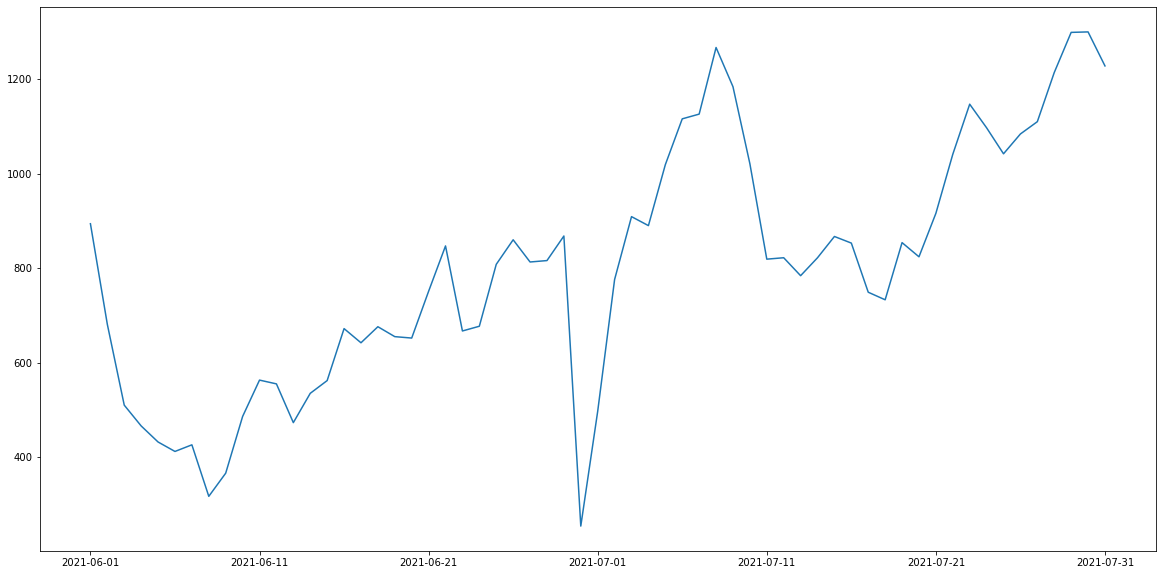

In [28]:
df['OFFER_START_DATE'].value_counts().sort_index().plot(subplots=True)

A variável de tempo de início das ofertas traz uma informação interessate. As ofertas se concentram entre os meses de junho e julho, com um total de 61 datas distintas. Há diferentes picos de ofertas, sendo os maiores entre o início e término de julho

## 3.2. OFFER_FINISH_DTTM <a class="anchor" id="section_3_2"></a>

In [29]:
df['OFFER_FINISH'] = pd.to_datetime(df['OFFER_FINISH_DTTM']).dt.date

In [30]:
df['OFFER_FINISH'].unique()

array([datetime.date(2021, 6, 22), datetime.date(2021, 6, 23),
       datetime.date(2021, 7, 8), datetime.date(2021, 7, 9),
       datetime.date(2021, 6, 3), datetime.date(2021, 6, 2),
       datetime.date(2021, 6, 12), datetime.date(2021, 6, 13),
       datetime.date(2021, 6, 26), datetime.date(2021, 6, 27),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 6, 16), datetime.date(2021, 6, 17),
       datetime.date(2021, 7, 3), datetime.date(2021, 7, 4),
       datetime.date(2021, 7, 7), datetime.date(2021, 6, 7),
       datetime.date(2021, 6, 6), datetime.date(2021, 7, 21),
       datetime.date(2021, 7, 20), datetime.date(2021, 7, 17),
       datetime.date(2021, 7, 18), datetime.date(2021, 7, 27),
       datetime.date(2021, 7, 28), datetime.date(2021, 7, 30),
       datetime.date(2021, 7, 31), datetime.date(2021, 7, 19),
       datetime.date(2021, 7, 10), datetime.date(2021, 6, 4),
  

array([<AxesSubplot:>], dtype=object)

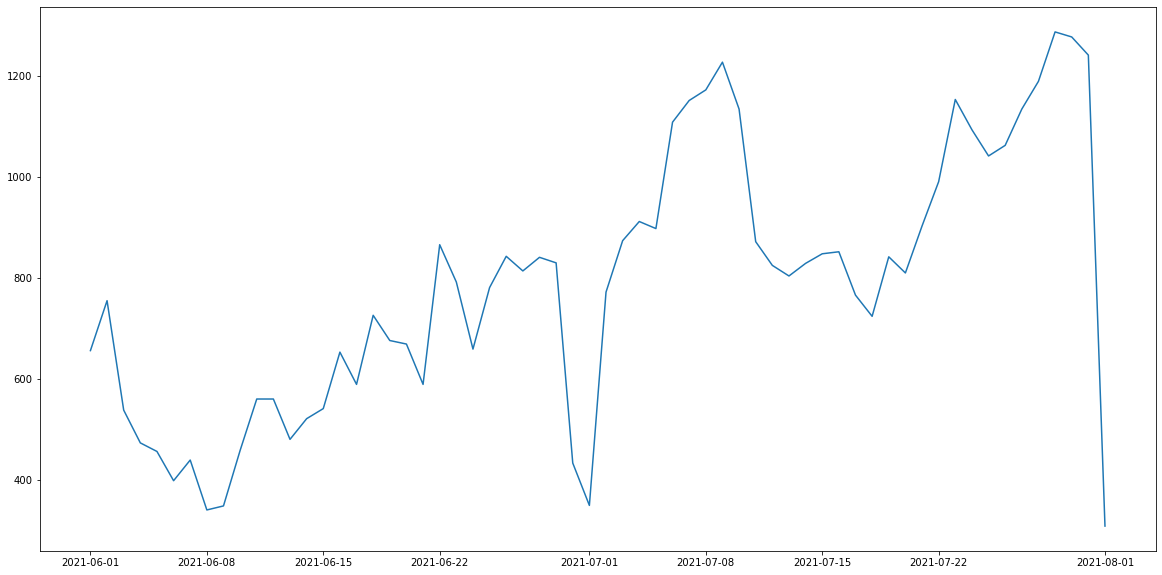

In [31]:
df['OFFER_FINISH'].sort_values(ascending=False).value_counts().plot(subplots=True)

## 3.3. OFFER_TYPE <a class="anchor" id="section_3_3"></a>

In [32]:
df['OFFER_TYPE'].value_counts()

lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

Todas as ofertas analisadas são do tipo relâmpago

## 3.4. INVOLVED_STOCK <a class="anchor" id="section_3_4"></a>

In [33]:
df['INVOLVED_STOCK'].sum()

1706476

In [34]:
pd.concat([df['INVOLVED_STOCK'].describe(), numerical['INVOLVED_STOCK'].describe()], axis=1)

,INVOLVED_STOCK,INVOLVED_STOCK
count,48746.000000,48746.000000
mean,35.007508,11.993415
std,206.761058,7.818291
min,1.000000,1.000000
25%,5.000000,5.000000
50%,10.000000,10.000000
75%,15.000000,15.000000
max,9000.000000,30.000000


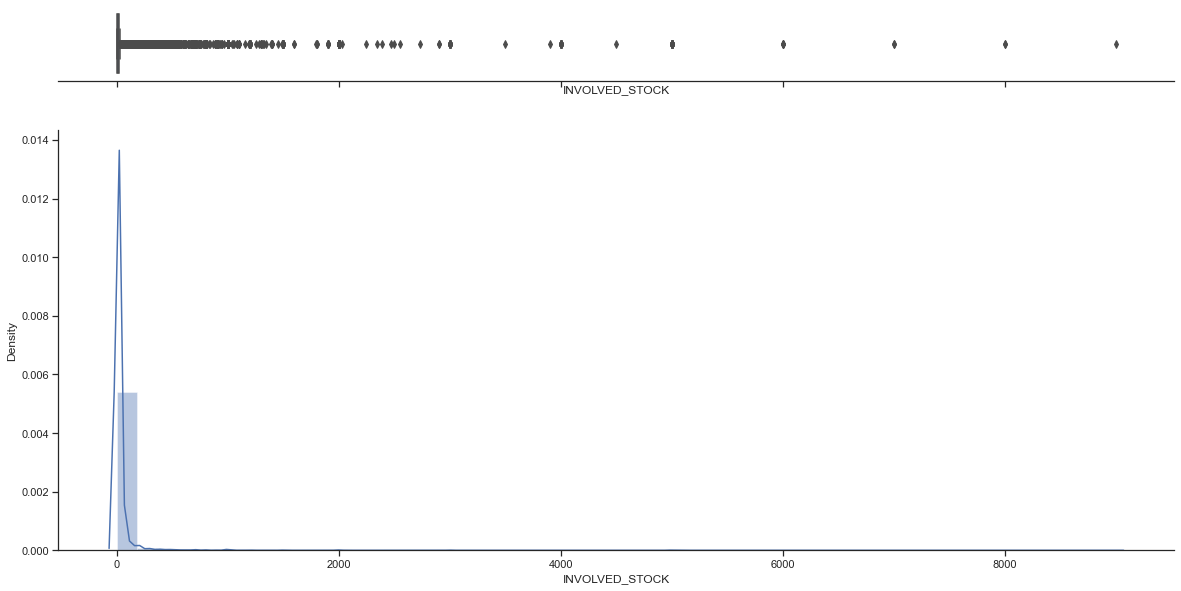

In [35]:
sns.set(style="ticks")
x = df['INVOLVED_STOCK']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

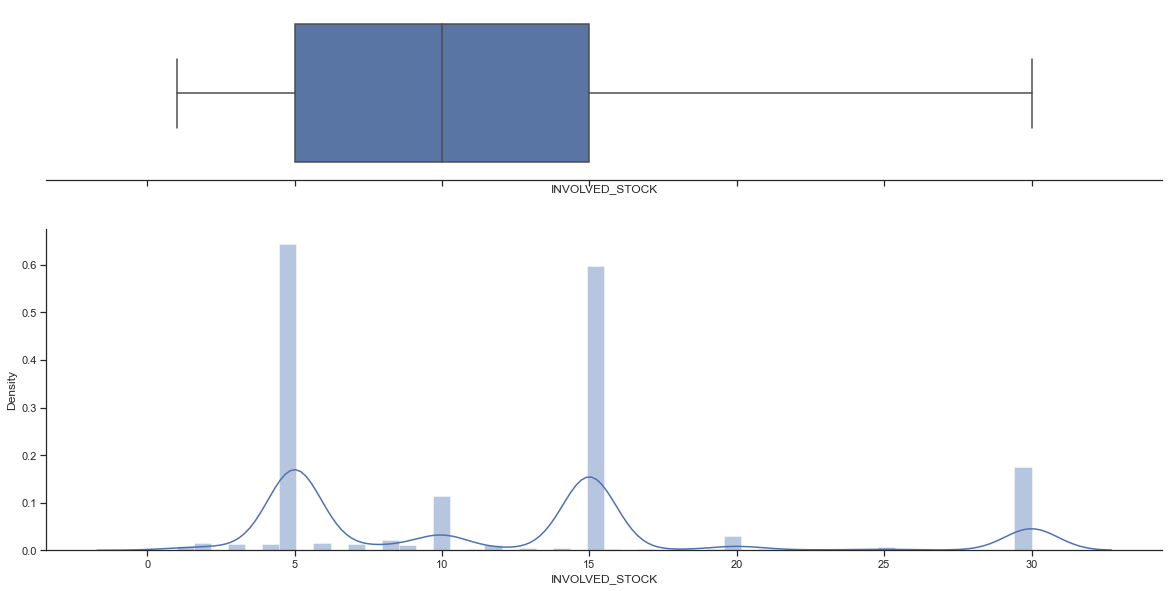

In [36]:
sns.set(style="ticks")
x = numerical['INVOLVED_STOCK']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.35, .65)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Haviam 1706476 produtos em estoque antes do início das ofertas relâmpagos. Há uma enorme variação de estoque entre os produtos, havendo alguns com apenas 1 e outros com 9000. Os valores extremos dificultam a visualização da distribuição e influenciam as medidas de tendência central. Avaliaremos como este estoque se distribui por categorias e domínios mais a frente.

## 3.5. REMAINING STOCK AFTER END <a class="anchor" id="section_3_5"></a>

In [37]:
df['REMAINING_STOCK_AFTER_END'].sum()

1489932

In [38]:
df['INVOLVED_STOCK'].sum() - df['REMAINING_STOCK_AFTER_END'].sum()

216544

In [39]:
df['INVOLVED_STOCK'].sum()/(df['INVOLVED_STOCK'].sum() - df['REMAINING_STOCK_AFTER_END'].sum())

7.880504654943106

In [40]:
pd.concat([df['REMAINING_STOCK_AFTER_END'].describe(), numerical['REMAINING_STOCK_AFTER_END'].describe()], axis=1)

,REMAINING_STOCK_AFTER_END,REMAINING_STOCK_AFTER_END
count,48746.000000,48746.000000
mean,30.565216,10.130975
std,195.813806,8.816264
min,-192.000000,-192.000000
25%,4.000000,4.000000
50%,8.000000,8.000000
75%,15.000000,15.000000
max,8635.000000,31.500000


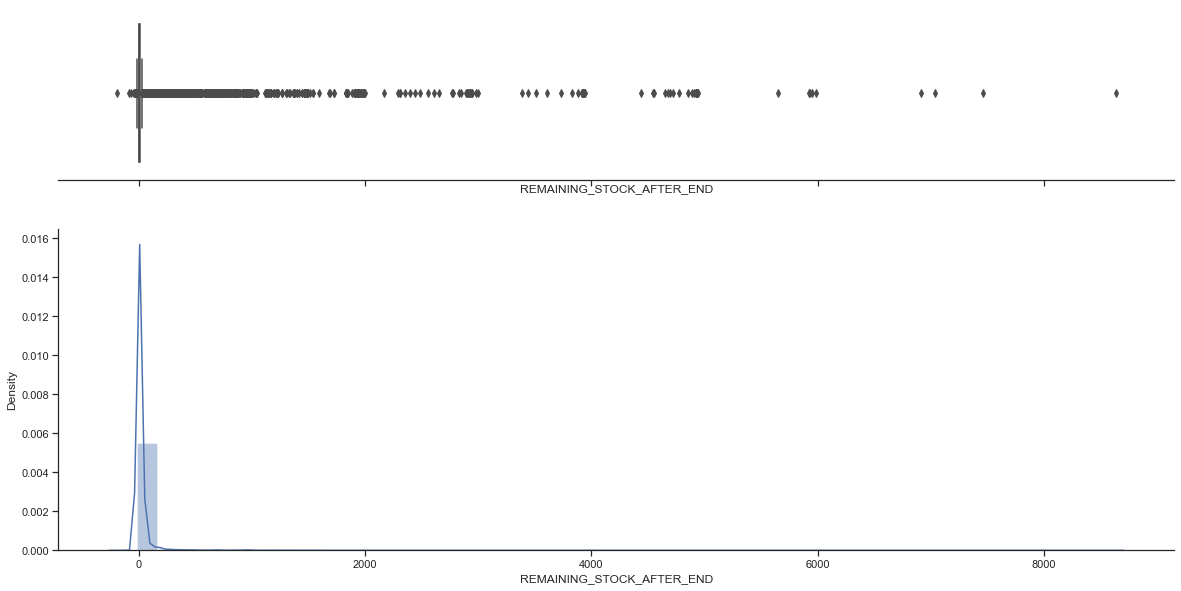

In [41]:
sns.set(style="ticks")
x = df['REMAINING_STOCK_AFTER_END']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.35, .65)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

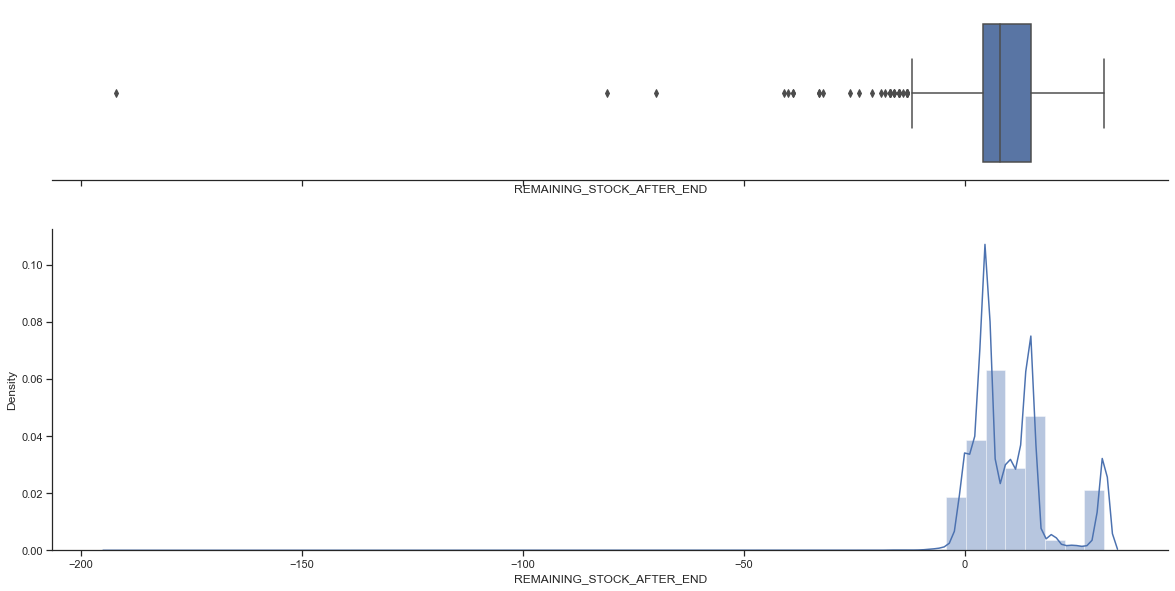

In [42]:
sns.set(style="ticks")
x = numerical['REMAINING_STOCK_AFTER_END']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.35, .65)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Restaram 1489932 produtos em estoque após as ofertas relâmpagos, o que totaliza um total de 216544 produtos vendidos (7,88% do estoque total) . A distribuição desta variável é similar à do estoque envolvido.

## 3.6. SOLD_AMOUNT <a class="anchor" id="section_3_6"></a>

In [43]:
df['SOLD_AMOUNT'].sum()

1258663.4999999998

In [44]:
pd.concat([df['SOLD_AMOUNT'].describe(), numerical['SOLD_AMOUNT'].describe()], axis=1)

,SOLD_AMOUNT,SOLD_AMOUNT
count,48746.000000,48746.000000
mean,25.820857,7.974013
std,127.051542,11.192949
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,12.590000,12.590000
max,4836.570000,31.475000


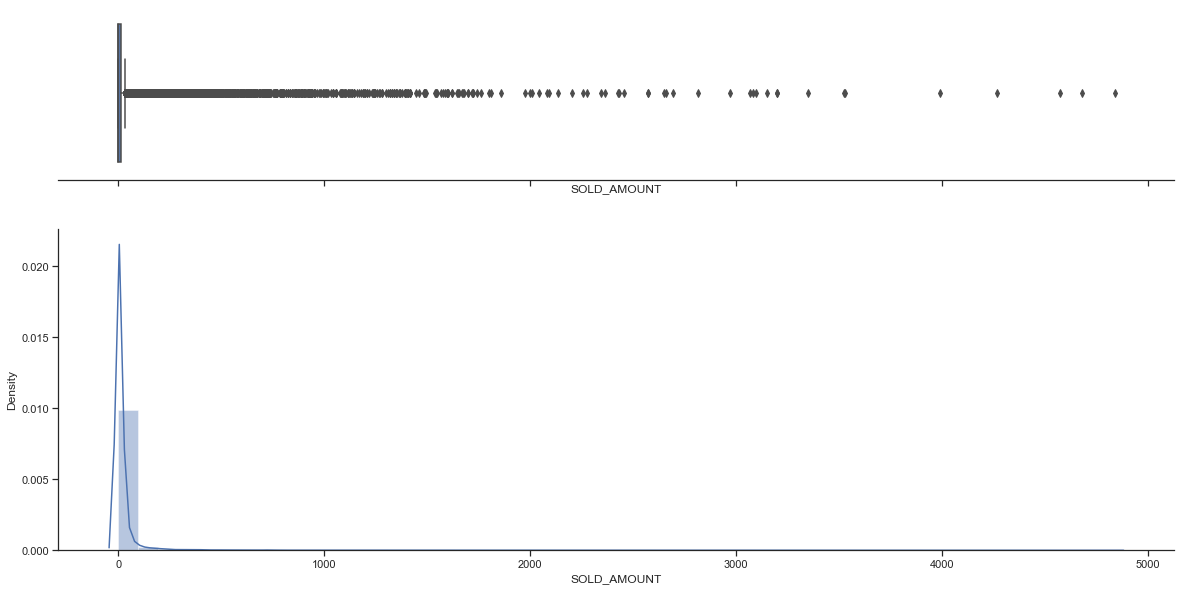

In [45]:
sns.set(style="ticks")
x = df['SOLD_AMOUNT']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.35, .65)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

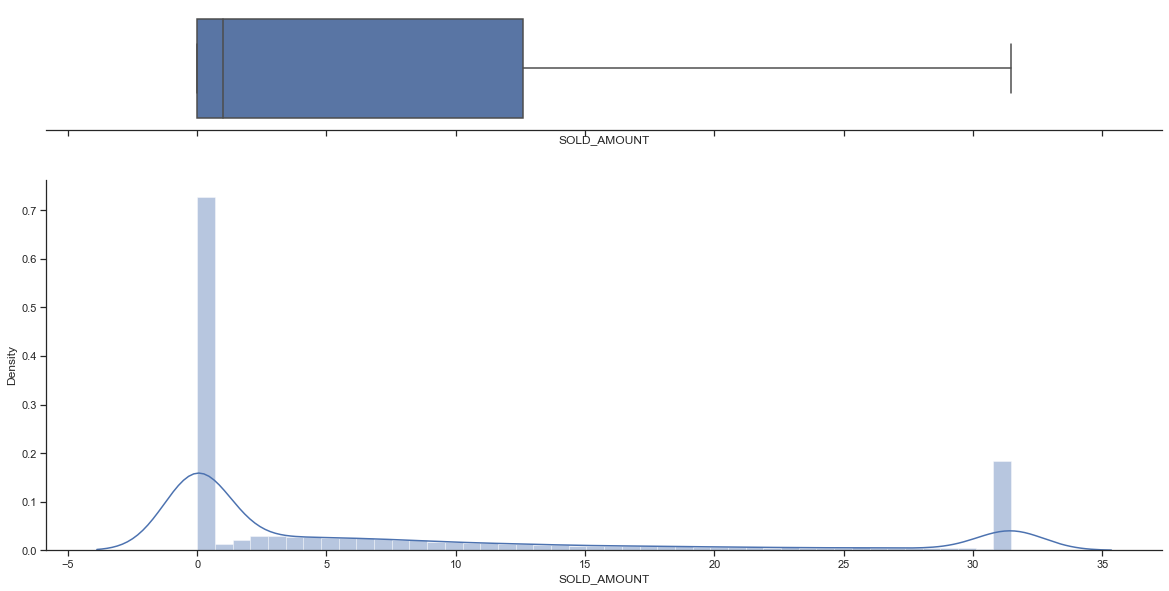

In [46]:
sns.set(style="ticks")
x = numerical['SOLD_AMOUNT']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Restaram 1489932 produtos em estoque após as ofertas relâmpagos, o que totaliza um total de 216544 produtos vendidos (7,88% do estoque total) . A distribuição desta variável é similar à do estoque envolvido.

## 3.7. SOLD_QUANTITY <a class="anchor" id="section_3_7"></a>

In [47]:
df['SOLD_QUANTITY'].sum()

266708.0

In [48]:
pd.concat([df['SOLD_QUANTITY'].describe(), numerical['SOLD_QUANTITY'].describe()], axis=1)

,SOLD_QUANTITY,SOLD_QUANTITY
count,48746.000000,48746.000000
mean,5.471382,1.794198
std,32.743776,2.503094
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,1646.000000,7.500000


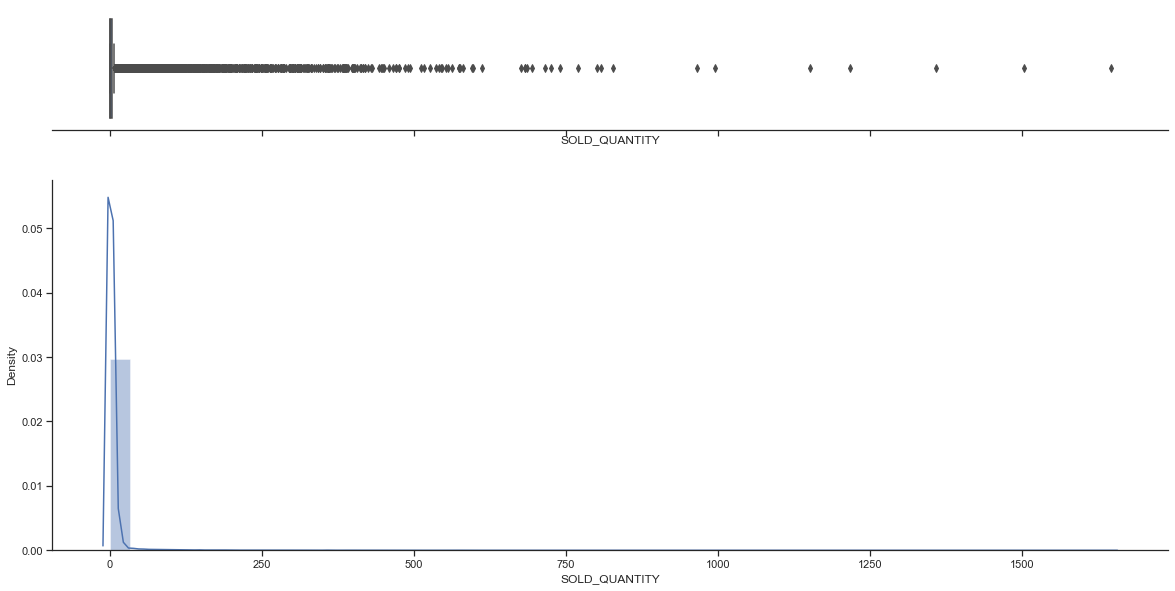

In [49]:
sns.set(style="ticks")
x = df['SOLD_QUANTITY']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

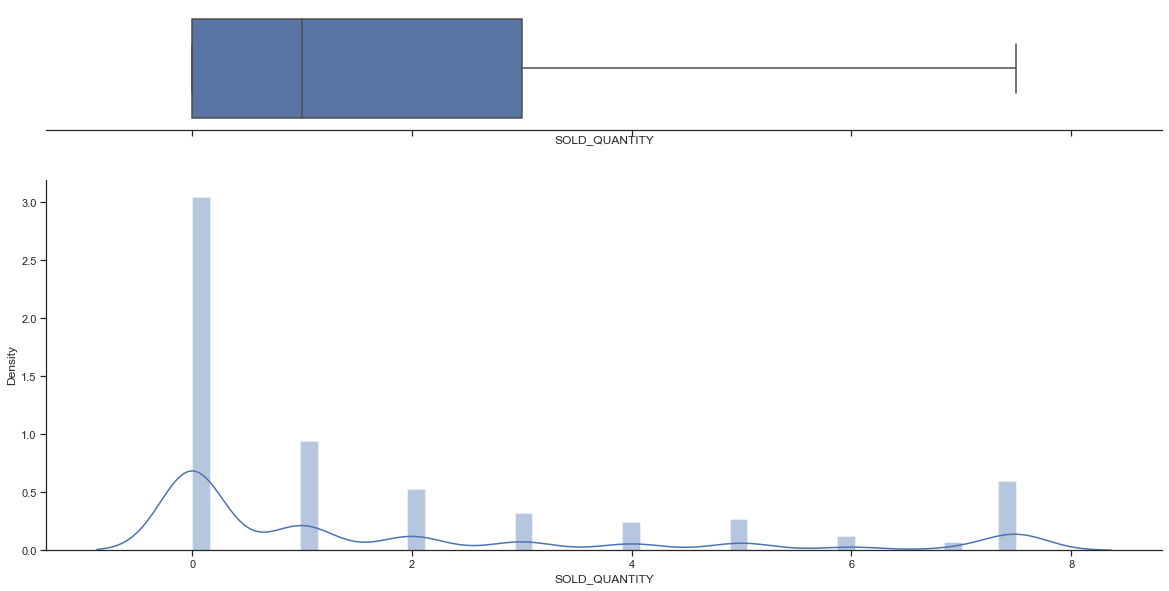

In [50]:
sns.set(style="ticks")
x = numerical['SOLD_QUANTITY']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Restaram 1489932 produtos em estoque após as ofertas relâmpagos, o que totaliza um total de 216544 produtos vendidos (7,88% do estoque total) . A distribuição desta variável é similar à do estoque envolvido.

## 3.8. ORIGIN <a class="anchor" id="section_3_8"></a>

In [51]:
df['ORIGIN'].value_counts()

UNKNOWN    37430
A          11316
Name: ORIGIN, dtype: int64

23% dos produtos listados nas ofertas relâmpago são da origem A, os outros 67% são de origem desconhecida

## 3.9. SHIPPING_PAYMENT_TYPE <a class="anchor" id="section_3_9"></a>

In [52]:
df['SHIPPING_PAYMENT_TYPE'].value_counts()

free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

Cerca de 54% dos produtos ofertados eram com frete grátis, os demais não apresentavam esta opção.

## 3.10. DOM_DOMAIN_AGG1 <a class="anchor" id="section_3_10"></a>

In [53]:
df['DOM_DOMAIN_AGG1'].value_counts()[:5]

HOME&DECOR            6742
APPAREL ACCESORIES    4387
APPAREL               3856
COMPUTERS             3770
SPORTS                3289
Name: DOM_DOMAIN_AGG1, dtype: int64

<AxesSubplot:ylabel='DOM_DOMAIN_AGG1'>

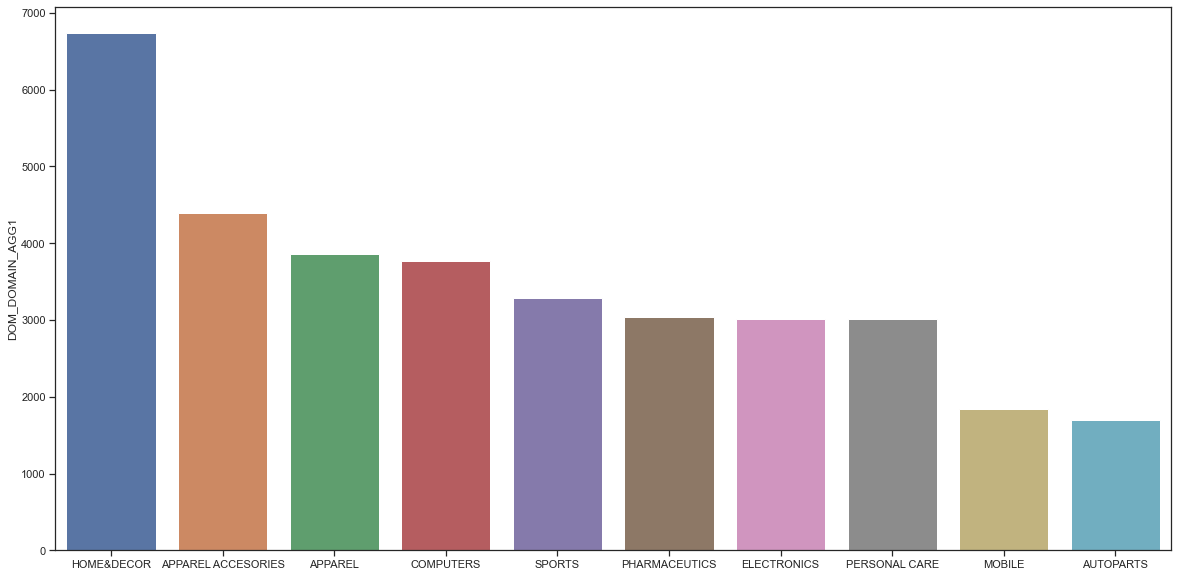

In [54]:
sns.barplot(x=df.DOM_DOMAIN_AGG1.value_counts()[:10].index, y=df.DOM_DOMAIN_AGG1.value_counts()[:10])

## 3.11. OFFER_DURATION <a class="anchor" id="section_3_11"></a>

In [55]:
df['OFFER_DURATION'].value_counts()[:5]

0 days 06:00:01    5828
0 days 06:00:00    5659
0 days 06:00:02    5103
0 days 08:00:00    4454
0 days 06:00:03    4354
Name: OFFER_DURATION, dtype: int64

<AxesSubplot:ylabel='OFFER_DURATION'>

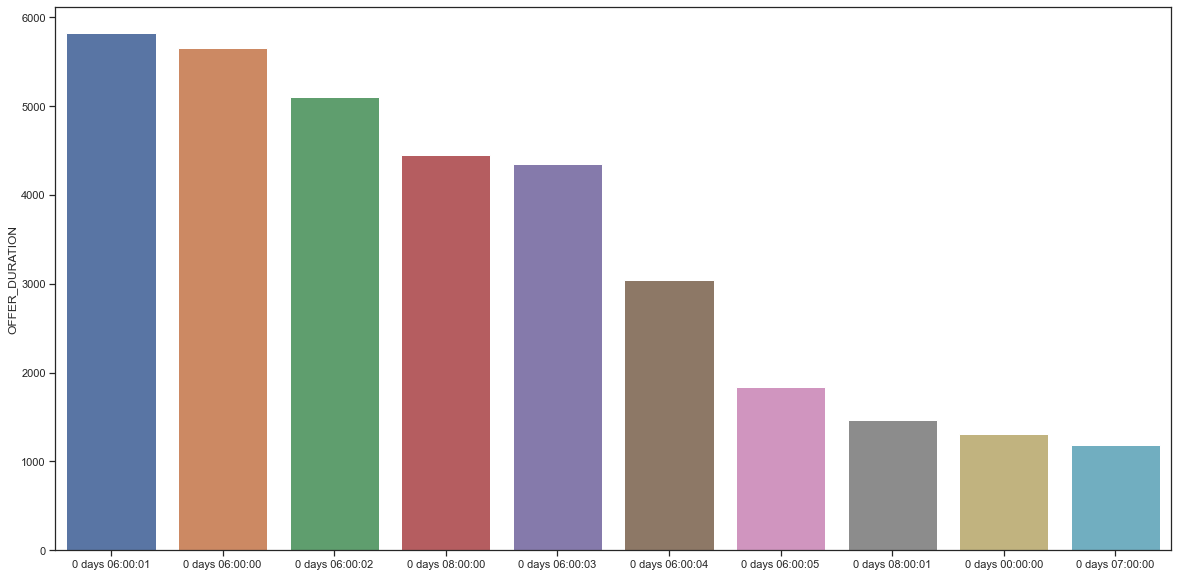

In [56]:
sns.barplot(x=df.OFFER_DURATION.value_counts()[:10].index, y=df.OFFER_DURATION.value_counts()[:10])

## 3.12. PRODUCT_VALUE <a class="anchor" id="section_3_12"></a>

In [57]:
pd.concat([df['PRODUCT_VALUE'].describe(), numerical['PRODUCT_VALUE'].describe()], axis=1)

,PRODUCT_VALUE,PRODUCT_VALUE
count,24579.000000,24579.000000
mean,8.840607,5.647501
std,22.367321,4.479477
min,0.121333,0.121333
25%,2.365000,2.365000
50%,3.994000,3.994000
75%,7.670000,7.670000
max,639.070000,15.627500


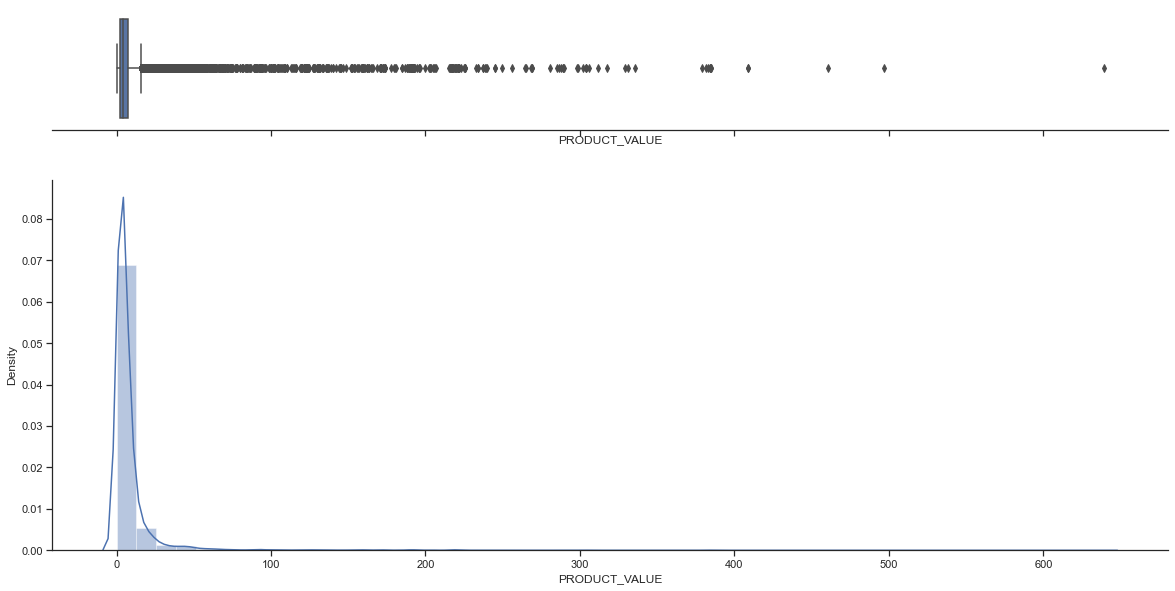

In [58]:
sns.set(style="ticks")
x = df['PRODUCT_VALUE']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

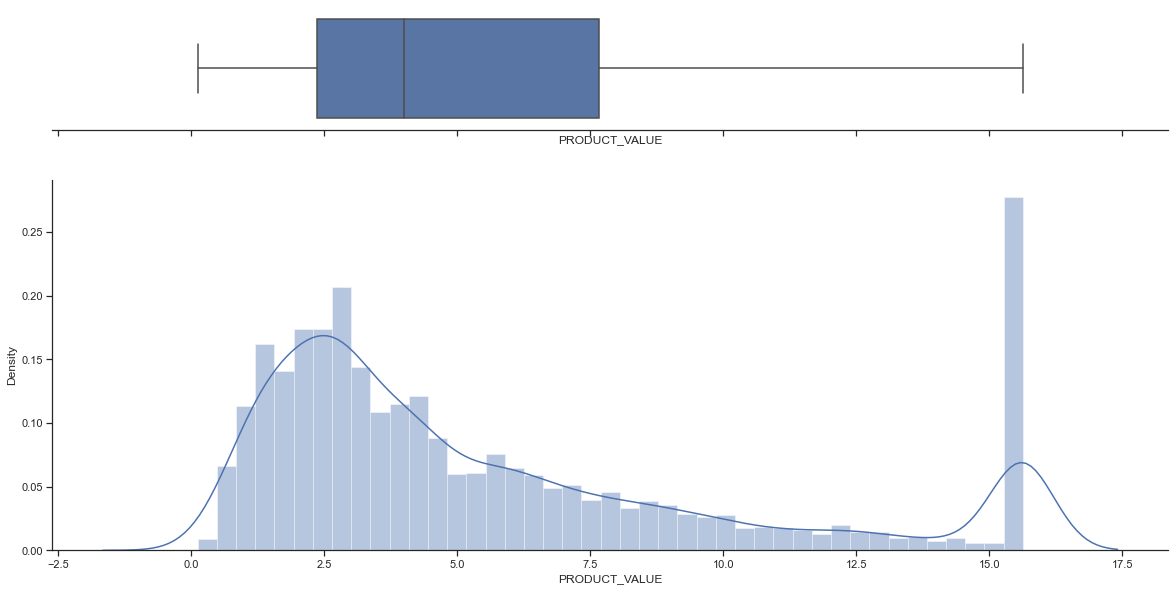

In [59]:
sns.set(style="ticks")
x = numerical['PRODUCT_VALUE']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Restaram 1489932 produtos em estoque após as ofertas relâmpagos, o que totaliza um total de 216544 produtos vendidos (7,88% do estoque total) . A distribuição desta variável é similar à do estoque envolvido.

## 3.13. FRACTION_PRODUCTS_SOLD <a class="anchor" id="section_3_13"></a>

In [60]:
pd.concat([df['FRACTION_PRODUCTS_SOLD'].describe(), numerical['FRACTION_PRODUCTS_SOLD'].describe()], axis=1)

,FRACTION_PRODUCTS_SOLD,FRACTION_PRODUCTS_SOLD
count,48746.000000,48746.000000
mean,0.206735,0.161882
std,0.353204,0.223626
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.010000,0.010000
75%,0.250000,0.250000
max,13.800000,0.625000


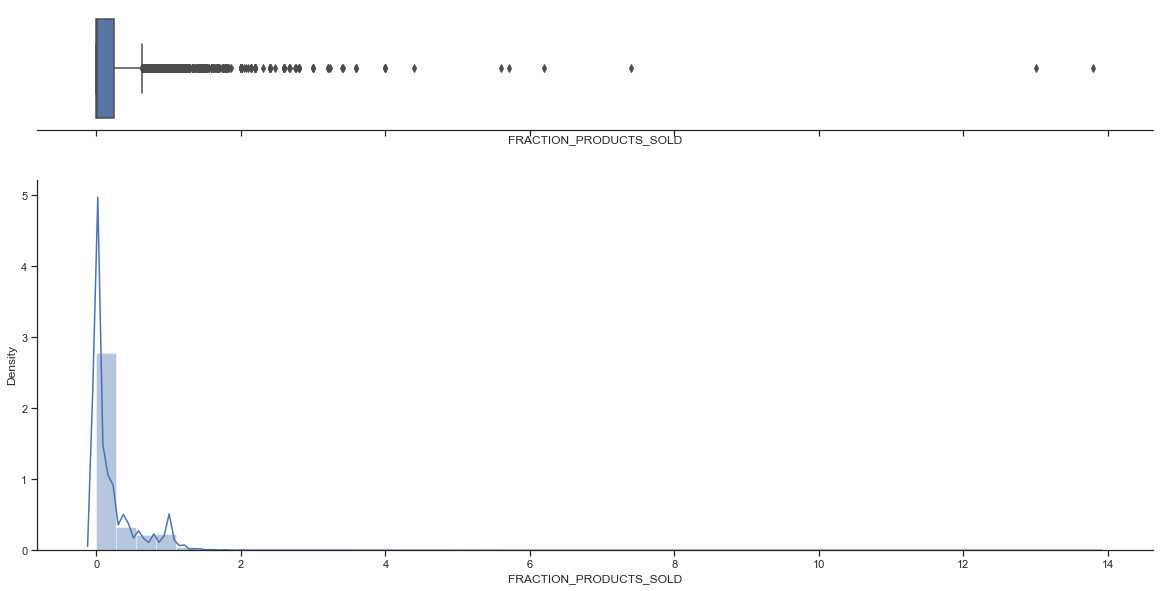

In [61]:
sns.set(style="ticks")
x = df['FRACTION_PRODUCTS_SOLD']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

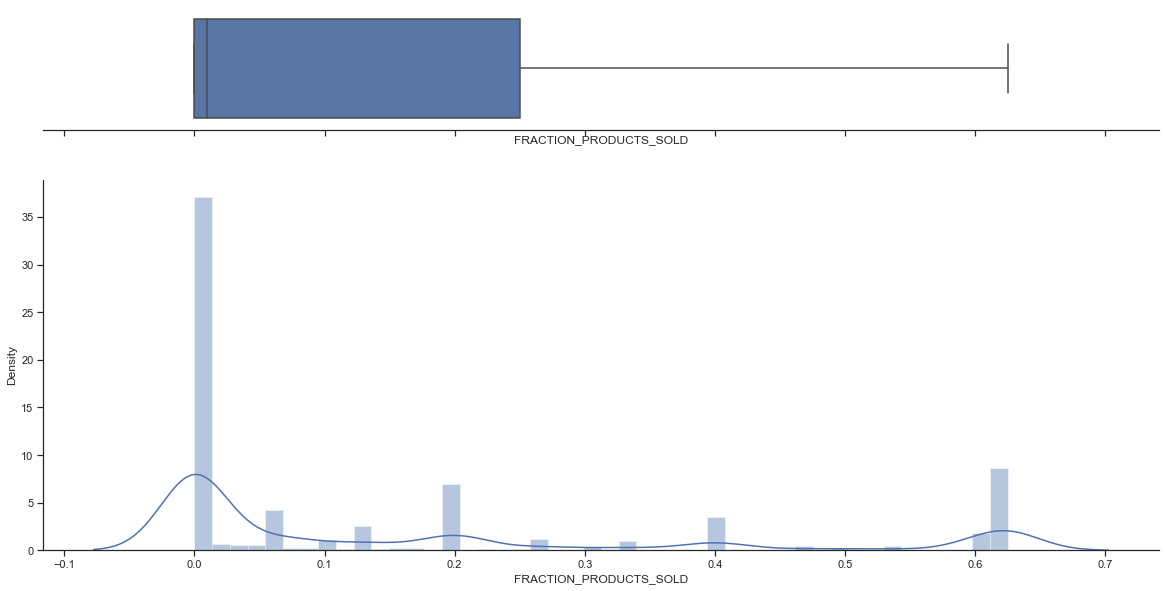

In [62]:
sns.set(style="ticks")
x = numerical['FRACTION_PRODUCTS_SOLD']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Restaram 1489932 produtos em estoque após as ofertas relâmpagos, o que totaliza um total de 216544 produtos vendidos (7,88% do estoque total) . A distribuição desta variável é similar à do estoque envolvido.

## 4. ANALISANDO RELAÇÕES ENTRE VARIÁVEIS <a class="anchor" id="chapter4"></a>

### 4.1. Relação entre Tempo de Duração da Oferta x Fração de Produtos Vendidos <a class="anchor" id="section_4_1"></a>

Irei verificar a relação entre o tempo de duração da oferta (OFFER_DURATION) e a fração de produtos vendidos (FRACTION_PRODUCTS_SOLD). A inteção é verificar se há alguma duração em que haja um indício de otimização na quantidade de vendas.

In [63]:
pd.concat([df['OFFER_DURATION'].describe(), df['FRACTION_PRODUCTS_SOLD'].describe()], axis=1)

,OFFER_DURATION,FRACTION_PRODUCTS_SOLD
count,48746,48746.000000
mean,0 days 05:42:30.039900709,0.206735
std,0 days 02:06:47.146022376,0.353204
min,0 days 00:00:00,0.000000
25%,0 days 06:00:00,0.000000
50%,0 days 06:00:02,0.010000
75%,0 days 06:00:16,0.250000
max,4 days 08:45:09,13.800000


O tempo médio de duração de uma oferta relâmpago é de 6 horas. Há registro de uma oferta com mais de 4 dias de duração, mas iremos considerar isso um evento atípico (outlier). O desvio padrão em cerca de 2 horas reforça que a estimativa média de duração de uma oferta relâmpago é de 6 horas.

In [64]:
df['OFFER_DURATION_h'] = df['OFFER_DURATION'].dt.components['hours']

In [65]:
df['OFFER_DURATION_h'].describe()

count    48746.000000
mean         5.653141
std          2.106710
min          0.000000
25%          6.000000
50%          6.000000
75%          6.000000
max         15.000000
Name: OFFER_DURATION_h, dtype: float64

Text(0, 0.5, 'Tempo da Oferta em Horas')

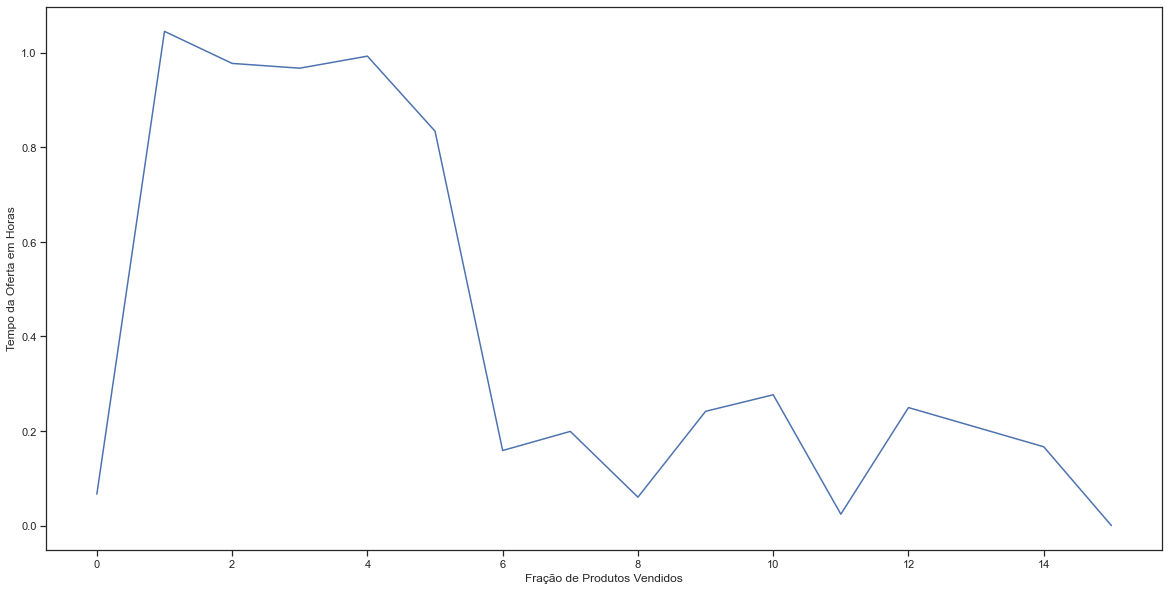

In [66]:
plt.plot(df['FRACTION_PRODUCTS_SOLD'].groupby(df['OFFER_DURATION_h']).mean())
plt.xlabel("Fração de Produtos Vendidos")
plt.ylabel("Tempo da Oferta em Horas")

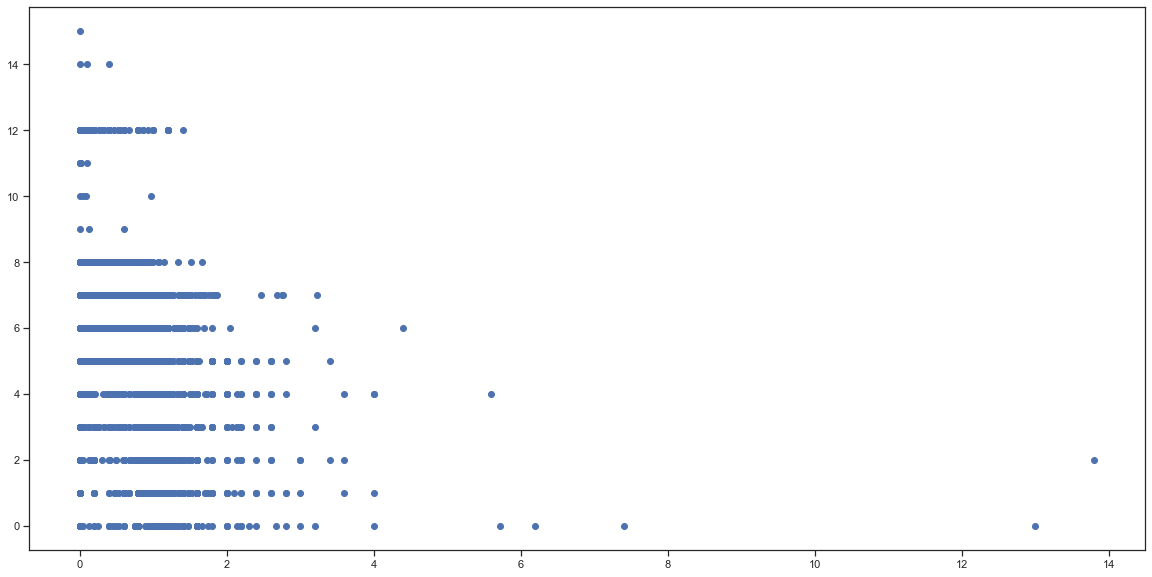

In [67]:
plt.scatter(df['FRACTION_PRODUCTS_SOLD'], df['OFFER_DURATION_h'])
plt.show()

As análises acima indicam os produtos com maior fração de venda são os com menor tempo de duração de oferta, média de 1h duração de oferta

## 4.2. Shipping Payment Type e o Desempenho de Vendas <a class="anchor" id="section_4_2"></a>

In [68]:
df['SOLD_AMOUNT'].groupby(df['SHIPPING_PAYMENT_TYPE']).describe()

,count,mean,std,min,25%,50%,75%,max
SHIPPING_PAYMENT_TYPE,,,,,,,,
free_shipping,26658.0,28.079230,131.054003,0.0,0.0,0.00,16.4575,4678.68
none,22088.0,23.095227,121.993582,0.0,0.0,2.53,9.6400,4836.57


In [69]:
df['SOLD_AMOUNT'].groupby(df['SHIPPING_PAYMENT_TYPE']).sum()

SHIPPING_PAYMENT_TYPE
free_shipping    748536.12
none             510127.38
Name: SOLD_AMOUNT, dtype: float64

In [70]:
SPT = df[['SHIPPING_PAYMENT_TYPE','SOLD_AMOUNT']].copy()
SPT['SOLD_AMOUNT_'] = numerical[['SOLD_AMOUNT']]
SPT['SOLD_QUANTITY_'] = numerical[['SOLD_QUANTITY']]
SPT.head()

,SHIPPING_PAYMENT_TYPE,SOLD_AMOUNT,SOLD_AMOUNT_,SOLD_QUANTITY_
0,none,4.72,4.720,6.0
1,free_shipping,0.00,0.000,0.0
2,none,10.73,10.730,3.0
3,none,7.03,7.030,2.0
4,none,39.65,31.475,7.5


<AxesSubplot:xlabel='SHIPPING_PAYMENT_TYPE', ylabel='SOLD_AMOUNT_'>

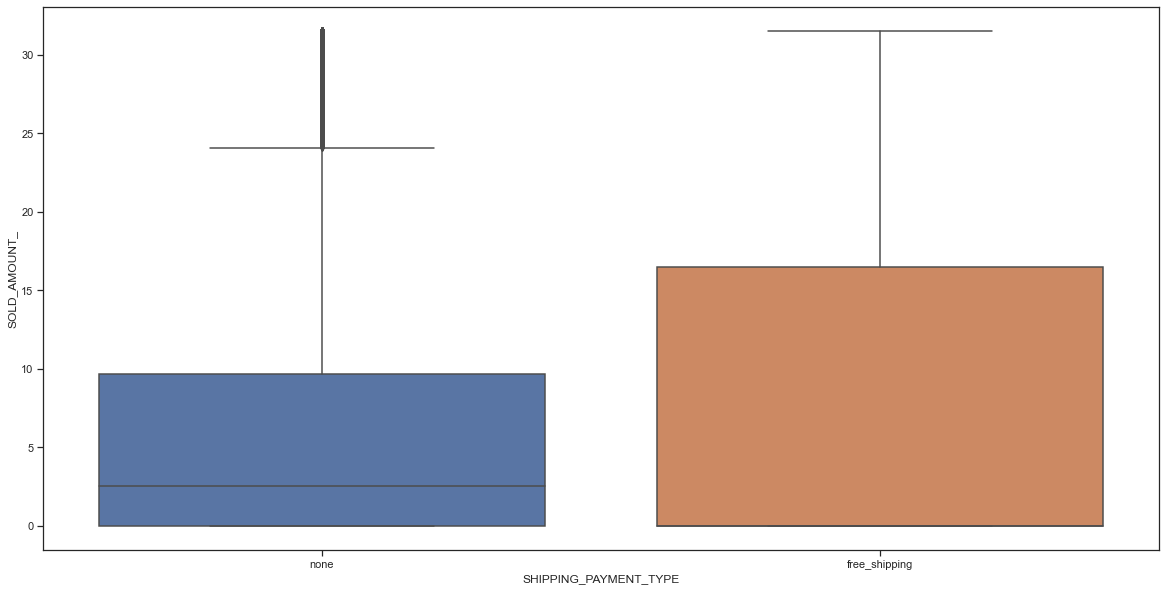

In [71]:
sns.boxplot(x="SHIPPING_PAYMENT_TYPE", y="SOLD_AMOUNT_", data=SPT)

In [72]:
df['SOLD_QUANTITY'].groupby(df['SHIPPING_PAYMENT_TYPE']).sum()

SHIPPING_PAYMENT_TYPE
free_shipping     64347.0
none             202361.0
Name: SOLD_QUANTITY, dtype: float64

<AxesSubplot:xlabel='SHIPPING_PAYMENT_TYPE', ylabel='SOLD_QUANTITY_'>

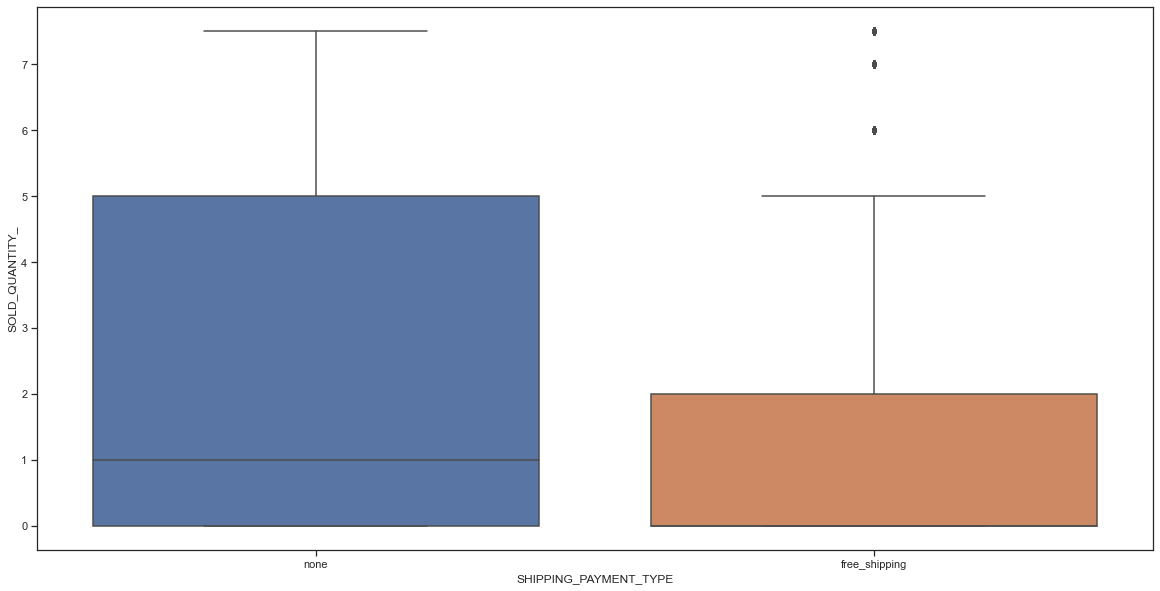

In [73]:
sns.boxplot(x="SHIPPING_PAYMENT_TYPE", y="SOLD_QUANTITY_", data=SPT)

É possível supor que, a maior parte dos produtos que foram vendidos não faziam parte do grupo que oferecia frete gratis aos clientes. Entretanto a maior renda gerada provém dos produtos vendidos com frete grátis. 
Seria interessante analisar a possibilidade de inclusão de alguns produtos que estão bem sucedidos no grupo de frete grátis, para que possa haver um crescimento tanto no número de vendas deste produto quanto na quantidade de receita recebidos.

Text(0, 0.5, 'Contagem de Produtos')

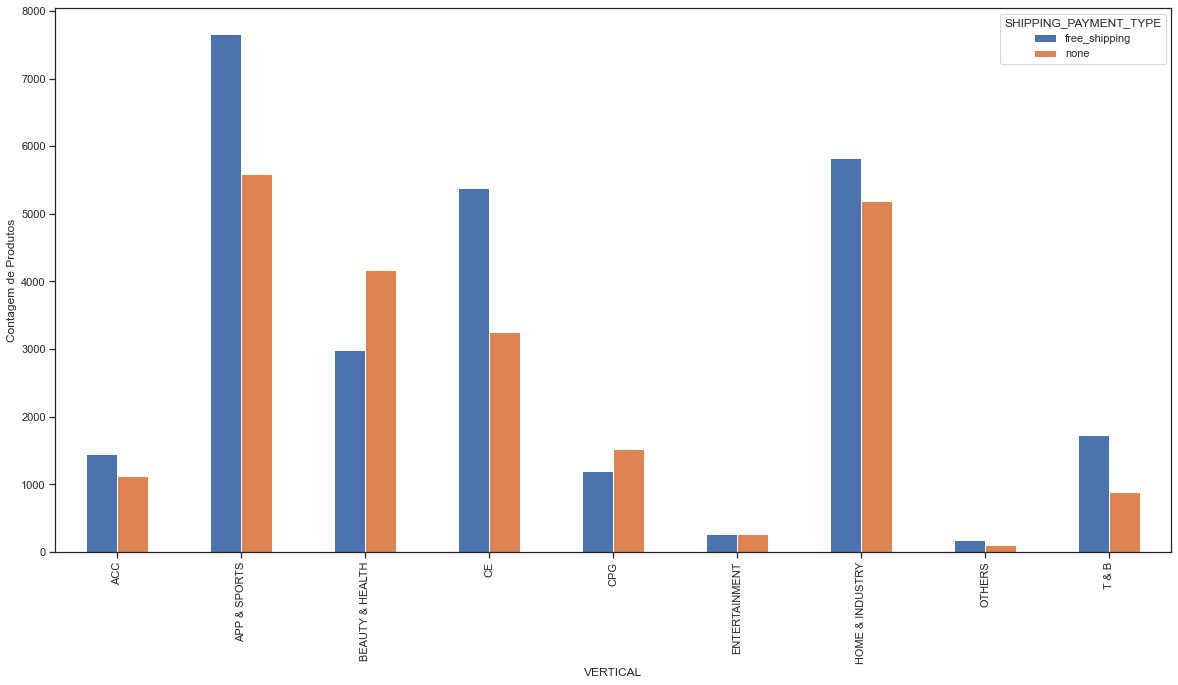

In [74]:
df['SHIPPING_PAYMENT_TYPE'].groupby(df['VERTICAL']).value_counts().unstack().plot(kind='bar')
plt.ylabel("Contagem de Produtos")

A figura acima ilustra a distribuição de produtos da categoria Vertical com e sem frete grátis. As únicas duas categorias em que a quantidade de produtos sem frete grátis é maior ocorrem em BEAUTY & HEALTH e CPG

# 5. Agrupando as variáveis numéricas pelas categorias de produtos <a class="anchor" id="chapter5"></a>

Há três variáveis que representam os tipos de produtos que são comercializados nas ofertas relâmpago.

* VERTICAL 
* DOM_DOMAIN_AGG1  
* DOMAIN_ID

Para cada um deles será analisada a distribuição das variáveis numéricas

In [75]:
df2=df.groupby(['VERTICAL',
                'DOM_DOMAIN_AGG1',
                'DOMAIN_ID'], as_index=False).agg({'INVOLVED_STOCK':'mean',
                                                  'REMAINING_STOCK_AFTER_END':'mean',
                                                  'SOLD_AMOUNT':'mean',
                                                  'SOLD_QUANTITY':'mean',
                                                  'PRODUCT_VALUE':'mean',
                                                   'FRACTION_PRODUCTS_SOLD':'mean',})

In [76]:
df2.head()

,VERTICAL,DOM_DOMAIN_AGG1,DOMAIN_ID,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,PRODUCT_VALUE,FRACTION_PRODUCTS_SOLD
0,ACC,ACC TOOLS,MLM-CAR_SCANNERS,10.0,8.255319,10.505426,1.819149,7.503757,0.22305
1,ACC,ACC TOOLS,MLM-HYDRAULIC_VEHICLE_JACKS,5.0,5.000000,0.000000,0.000000,NaN,0.00000
2,ACC,AGRO,MLM-EAR_TAG_APPLICATORS,10.0,10.000000,0.000000,0.000000,NaN,0.00000
3,ACC,AUTOPARTS,MLM-ABS_SENSORS,5.0,5.000000,0.000000,0.000000,NaN,0.00000
4,ACC,AUTOPARTS,MLM-AUTOMOBILE_FUEL_PUMPS,5.0,5.000000,0.000000,0.000000,NaN,0.00000


## 5.1 VERTICAL <a class="anchor" id="section_5_1"></a>

### 5.1.1. DESCRIÇÃO RESUMO DE VERTICAL <a class="anchor" id="section_5_1_1"></a>

In [77]:
df.groupby(df['VERTICAL']).describe()

INVOLVED_STOCK                                                \
                         count        mean         std  min  25%   50%   75%   
VERTICAL                                                                       
ACC                     2573.0    9.565099    7.587805  1.0  5.0   5.0  15.0   
APP & SPORTS           13241.0   18.122347   95.068151  1.0  5.0  10.0  15.0   
BEAUTY & HEALTH         7150.0  127.335524  500.926306  1.0  5.0  15.0  16.0   
CE                      8629.0   24.500753   82.065260  1.0  5.0  15.0  15.0   
CPG                     2714.0   14.723287   31.518523  1.0  5.0   8.0  15.0   
ENTERTAINMENT            525.0    6.032381    5.456359  1.0  5.0   5.0   5.0   
HOME & INDUSTRY        11011.0   20.907002   55.782923  1.0  5.0  15.0  15.0   
OTHERS                   279.0   10.394265    5.778474  1.0  5.0  10.0  15.0   
T & B                   2624.0   16.695122   33.481299  1.0  5.0  10.0  15.0   

                        REMAINING_STOCK_AFTER_END              ...  \
                    max                     count        mean  ...   
VERTICAL                                                       ...   
ACC               200.0                    2573.0    7.556160  ...   
APP & SPORTS     6000.0                   13241.0   16.271807  ...   
BEAUTY & HEALTH  9000.0                    7150.0  109.930629  ...   
CE               2000.0                    8629.0   21.507591  ...   
CPG               500.0                    2714.0   12.517686  ...   
ENTERTAINMENT     100.0                     525.0    5.335238  ...   
HOME & INDUSTRY  1500.0                   11011.0   18.431659  ...   
OTHERS             40.0                     279.0    9.129032  ...   
T & B             800.0                    2624.0   15.689787  ...   

                FRACTION_PRODUCTS_SOLD            OFFER_DURATION_h            \
                                   75%        max            count      mean   
VERTICAL                                                                       
ACC                           0.333333   3.600000           2573.0  5.308589   
APP & SPORTS                  0.200000   7.400000          13241.0  5.695491   
BEAUTY & HEALTH               0.400000   3.600000           7150.0  5.474545   
CE                            0.200000  13.800000           8629.0  5.547109   
CPG                           0.200000   5.714286           2714.0  5.635225   
ENTERTAINMENT                 0.200000   1.000000            525.0  5.780952   
HOME & INDUSTRY               0.200000   4.000000          11011.0  5.756335   
OTHERS                        0.200000   1.500000            279.0  5.537634   
T & B                         0.066667  13.000000           2624.0  6.184832   

                                                     
                      std  min  25%  50%  75%   max  
VERTICAL                                             
ACC              1.990743  0.0  6.0  6.0  6.0  12.0  
APP & SPORTS     1.933061  0.0  6.0  6.0  6.0  12.0  
BEAUTY & HEALTH  2.213808  0.0  6.0  6.0  6.0  14.0  
CE               2.273696  0.0  6.0  6.0  6.0  15.0  
CPG              2.270573  0.0  6.0  6.0  7.0  14.0  
ENTERTAINMENT    2.067473  0.0  6.0  6.0  6.0  12.0  
HOME & INDUSTRY  2.033267  0.0  6.0  6.0  6.0  12.0  
OTHERS           2.491247  0.0  6.0  6.0  7.0   8.0  
T & B            2.142232  0.0  6.0  6.0  8.0  12.0  

[9 rows x 64 columns]

### 5.1.2. Estoque por Categorias - Antes e Após as promoções <a class="anchor" id="section_5_1_2"></a>

In [78]:
pd.concat([df['INVOLVED_STOCK'].groupby(df['VERTICAL']).sum(),
           df['REMAINING_STOCK_AFTER_END'].groupby(df['VERTICAL']).sum()], axis=1)

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END
VERTICAL,,
ACC,24611,19442
APP & SPORTS,239958,215455
BEAUTY & HEALTH,910449,786004
CE,211417,185589
CPG,39959,33973
ENTERTAINMENT,3167,2801
HOME & INDUSTRY,230207,202951
OTHERS,2900,2547
T & B,43808,41170


<AxesSubplot:xlabel='VERTICAL'>

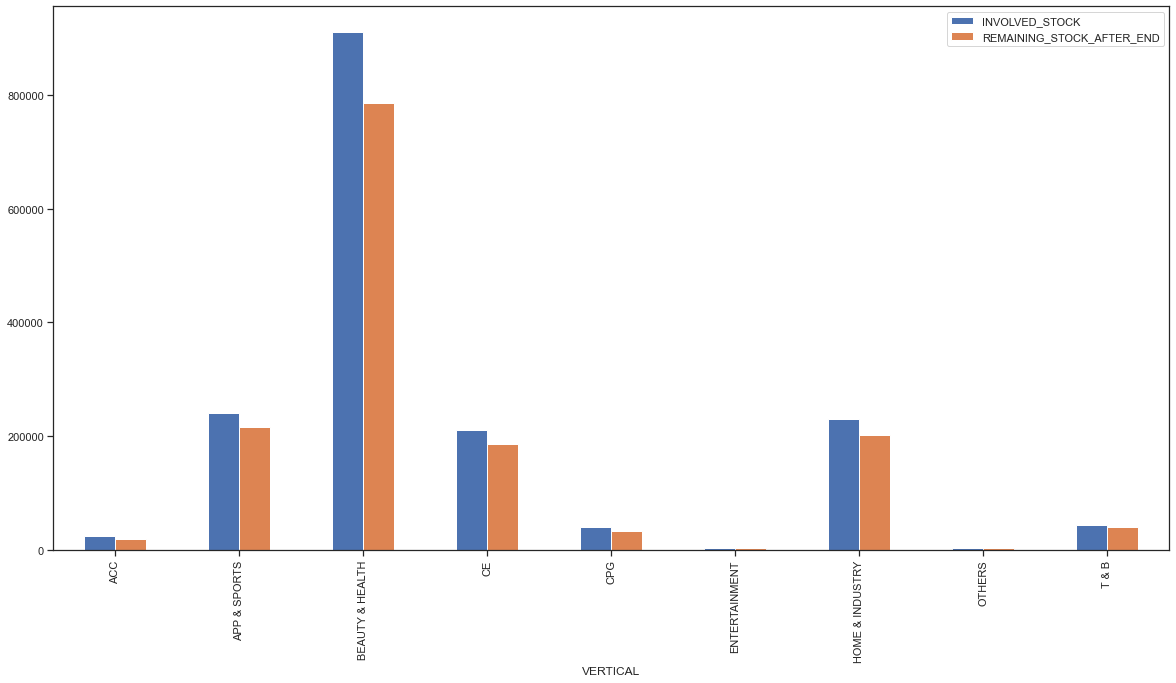

In [79]:
df[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END']].groupby(df['VERTICAL']).sum().plot(kind='bar')

Os estoque que sofreram maior alteração após os períodos promocionais foram de BEAUTY & HEALTH e HOME & INDUSTRY

### 5.1.3. Quais categorias de Vertical tiveram maior volume de vendas? <a class="anchor" id="section_5_1_3"></a>

In [80]:
pd.concat([df['SOLD_AMOUNT'].groupby(df['VERTICAL']).sum(),
           df['SOLD_QUANTITY'].groupby(df['VERTICAL']).sum()], axis=1)

,SOLD_AMOUNT,SOLD_QUANTITY
VERTICAL,,
ACC,26819.98,5156.0
APP & SPORTS,131101.36,25658.0
BEAUTY & HEALTH,547427.27,178141.0
CE,362787.94,21833.0
CPG,16787.68,5696.0
ENTERTAINMENT,1988.57,357.0
HOME & INDUSTRY,155518.68,27161.0
OTHERS,1929.24,357.0
T & B,14302.78,2349.0


<AxesSubplot:xlabel='VERTICAL'>

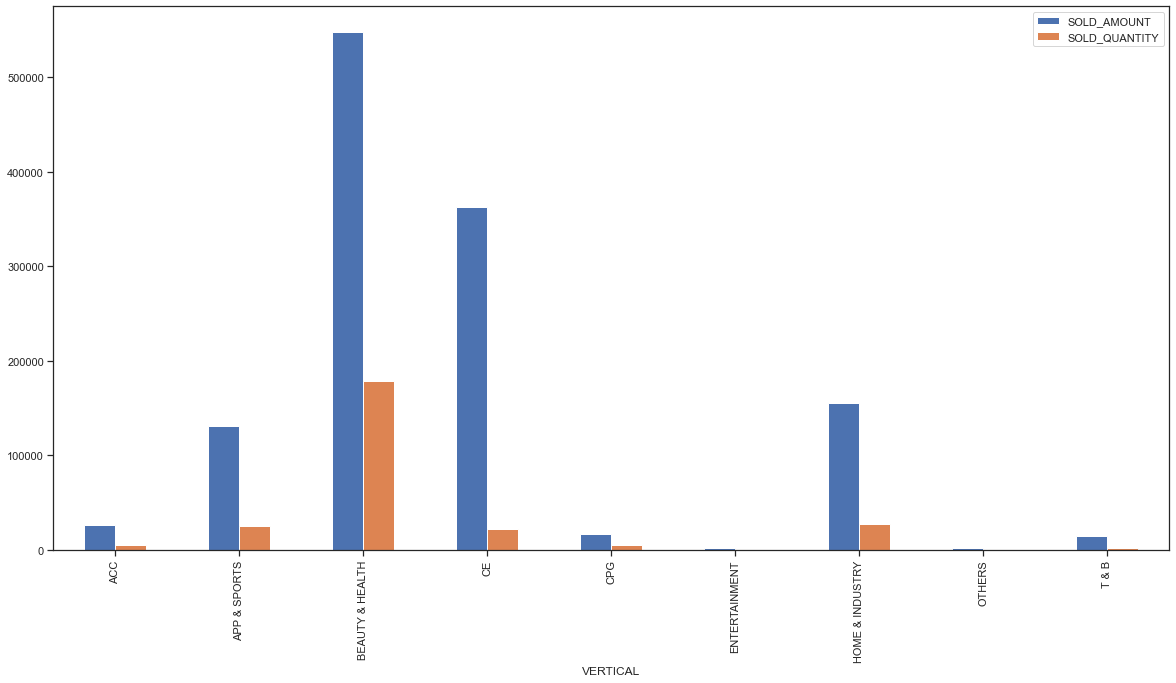

In [81]:
df[['SOLD_AMOUNT', 'SOLD_QUANTITY']].groupby(df['VERTICAL']).sum().plot(kind='bar')

Nesta análise é possível ver o destaque da categoria BEAUTH & HEALTH e HOME & INDUSTRY, mas a categoria que teve o maior volume de vendas foi a de CE. O valor arrecadado por esta categoria é mais que 16 vezes maior que a quantidade de vendida pela mesma.

### 5.1.4. Analisando em conjunto as quatro variáveis <a class="anchor" id="section_5_1_4"></a>

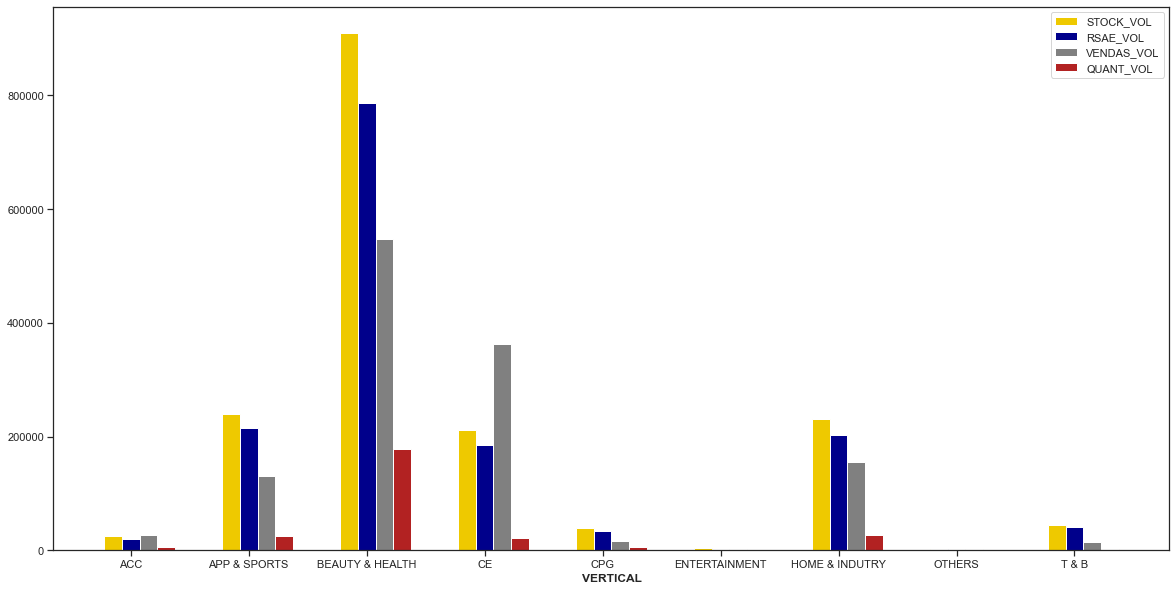

In [82]:
STOCK_VOL = df['INVOLVED_STOCK'].groupby(df['VERTICAL']).sum()
RSAE_VOL = df['REMAINING_STOCK_AFTER_END'].groupby(df['VERTICAL']).sum()
VENDAS_VOL = df['SOLD_AMOUNT'].groupby(df['VERTICAL']).sum()
QUANT_VOL = df['SOLD_QUANTITY'].groupby(df['VERTICAL']).sum()

barWidth = 0.15

r1 = np.arange(len(STOCK_VOL))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
plt.bar(r1, STOCK_VOL, color='#EEC900', width=barWidth, edgecolor='white', label='STOCK_VOL')
plt.bar(r2, RSAE_VOL, color='#00008B', width=barWidth, edgecolor='white', label='RSAE_VOL')
plt.bar(r3, VENDAS_VOL, color='#808080', width=barWidth, edgecolor='white', label='VENDAS_VOL')
plt.bar(r4, QUANT_VOL, color='#B22222', width=barWidth, edgecolor='white', label='QUANT_VOL')
 
plt.xlabel('VERTICAL', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(STOCK_VOL))], ['ACC', 'APP & SPORTS', 'BEAUTY & HEALTH',
                                                           'CE', 'CPG', 'ENTERTAINMENT', 
                                                           'HOME & INDUTRY', 'OTHERS', 'T & B' ])
 
plt.legend()
plt.show()


Como analisado anteriormente, a categoria CE foi a que apresentou maior volume de vendas percentual. A categoria ACC também teve volume de vendas superior 

### 5.1.5. Estimativa do valor dos produtos por Categoria (Vertical) <a class="anchor" id="section_5_1_5"></a>

In [87]:
VER_PV = df[['VERTICAL','PRODUCT_VALUE']].copy()
VER_PV['PRODUCT_VALUE_'] = numerical[['PRODUCT_VALUE']]
VER_PV['FRACTION_PRODUCTS_SOLD_'] = numerical[['FRACTION_PRODUCTS_SOLD']]
VER_PV.head()

,VERTICAL,PRODUCT_VALUE,PRODUCT_VALUE_,FRACTION_PRODUCTS_SOLD_
0,CPG,0.786667,0.786667,0.625000
1,OTHERS,NaN,NaN,0.000000
2,CE,3.576667,3.576667,0.200000
3,CE,3.515000,3.515000,0.133333
4,CE,2.643333,2.643333,0.625000


<AxesSubplot:xlabel='VERTICAL', ylabel='PRODUCT_VALUE'>

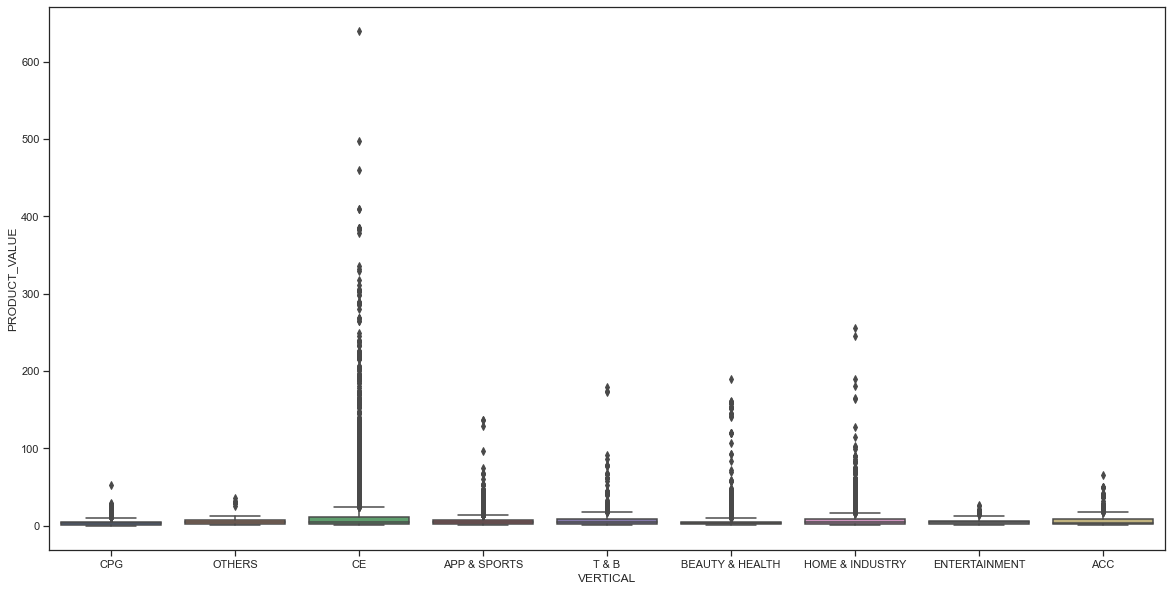

In [88]:
sns.boxplot(x="VERTICAL", y="PRODUCT_VALUE", data=VER_PV)

<AxesSubplot:xlabel='VERTICAL', ylabel='PRODUCT_VALUE_'>

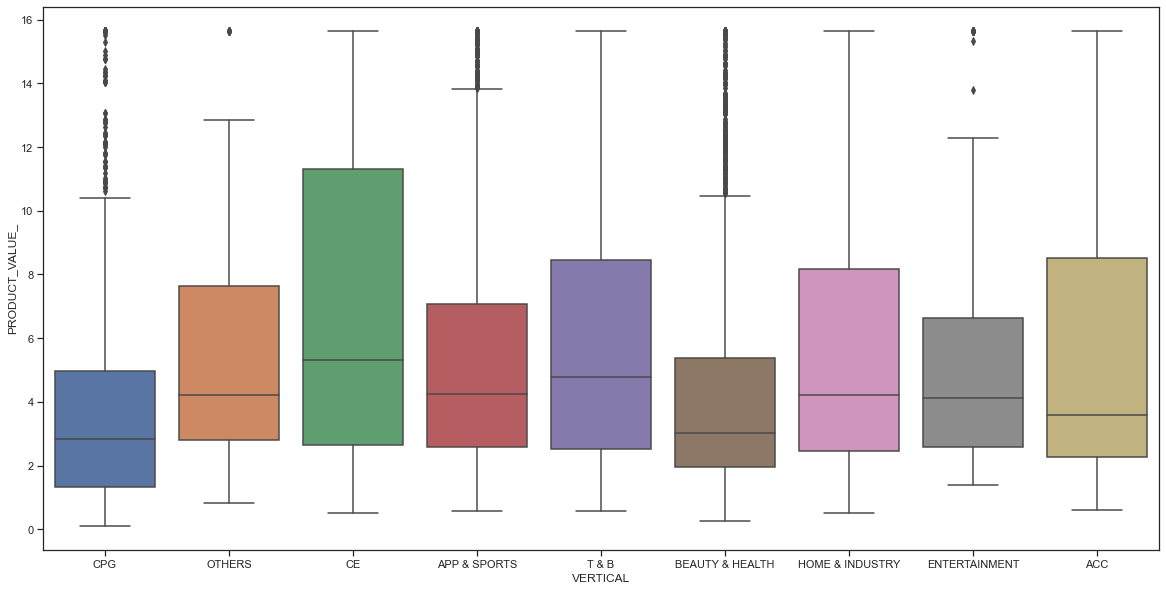

In [89]:
sns.boxplot(x="VERTICAL", y="PRODUCT_VALUE_", data=VER_PV)

<AxesSubplot:xlabel='VERTICAL', ylabel='FRACTION_PRODUCTS_SOLD_'>

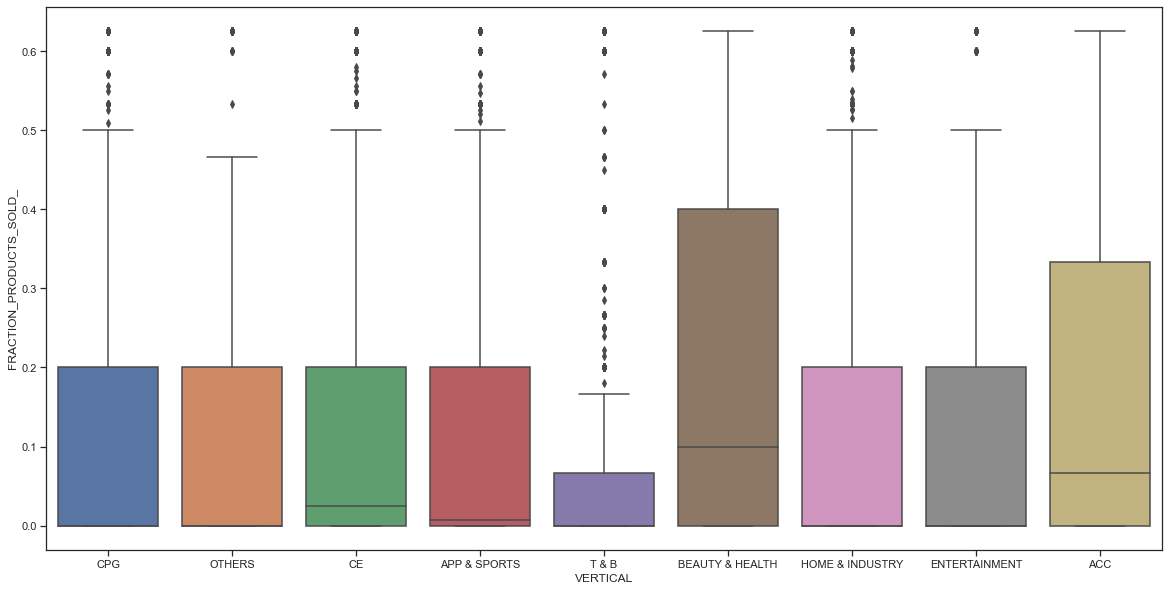

In [90]:
sns.boxplot(x="VERTICAL", y="FRACTION_PRODUCTS_SOLD_", data=VER_PV)

A categoria T&B foi a que teve menor fração de produtos vendidos, já a BEAUTY & HEALTH foi a que obteve o valor mais expressivo, seguida de ACC.

## 5.2 DOM_DOMAIN_AGG1 (Explorando a classe BEAUTY & HEALTH) <a class="anchor" id="section_5_2"></a>

### 5.2.1. Qual Produto foi mais bem sucedido? <a class="anchor" id="section_5_2_1"></a>

In [91]:
df.loc[df['VERTICAL'] == 'BEAUTY & HEALTH'].groupby(df['DOM_DOMAIN_AGG1']).describe()

INVOLVED_STOCK                                          \
                          count        mean         std  min  25%   50%   
DOM_DOMAIN_AGG1                                                           
BEAUTY EQUIPMENT         1099.0  157.095541  560.775331  1.0  5.0  15.0   
PERSONAL CARE            3016.0   12.186340   16.782575  1.0  5.0  10.0   
PHARMACEUTICS            3035.0  230.987479  672.996299  1.0  7.5  15.0   

                                REMAINING_STOCK_AFTER_END              ...  \
                    75%     max                     count        mean  ...   
DOM_DOMAIN_AGG1                                                        ...   
BEAUTY EQUIPMENT   15.0  5000.0                    1099.0  135.851683  ...   
PERSONAL CARE      15.0   500.0                    3016.0   10.162135  ...   
PHARMACEUTICS     186.5  9000.0                    3035.0  199.688303  ...   

                 FRACTION_PRODUCTS_SOLD      OFFER_DURATION_h            \
                                    75%  max            count      mean   
DOM_DOMAIN_AGG1                                                           
BEAUTY EQUIPMENT               0.400000  2.6           1099.0  5.506824   
PERSONAL CARE                  0.266667  2.8           3016.0  5.342838   
PHARMACEUTICS                  0.600000  3.6           3035.0  5.593740   

                                                      
                       std  min  25%  50%  75%   max  
DOM_DOMAIN_AGG1                                       
BEAUTY EQUIPMENT  2.344761  0.0  6.0  6.0  7.0  12.0  
PERSONAL CARE     2.127410  0.0  6.0  6.0  6.0  12.0  
PHARMACEUTICS     2.242550  0.0  5.0  6.0  7.0  14.0  

[3 rows x 64 columns]

<AxesSubplot:xlabel='DOM_DOMAIN_AGG1'>

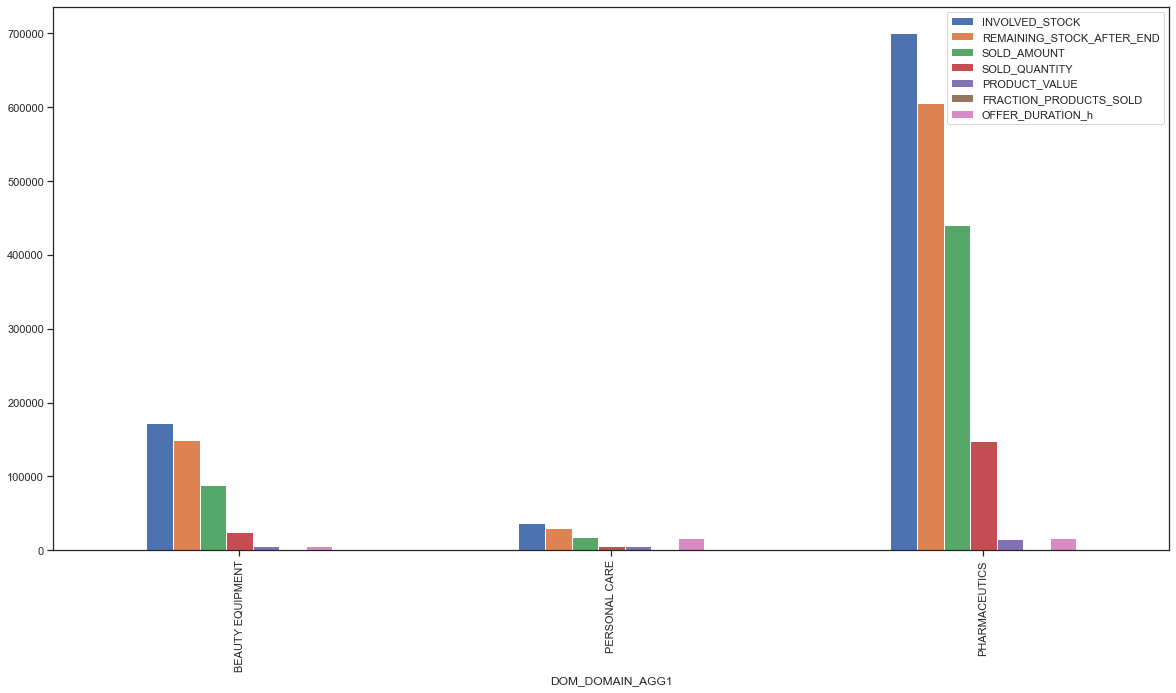

In [92]:
df.loc[df['VERTICAL'] == 'BEAUTY & HEALTH'].groupby(df['DOM_DOMAIN_AGG1']).sum().plot(kind='bar')

A categoria BEAUTY & HEALTH foi um dos destaques na exploração das categorias de VERTICAL. Ela é comporta de outras 3 sub categorias:
* BEAUTY EQUIPMENT
* PERSONAL CARE
* PHARMACEUTICS

A categoria pharmaceutics é a que detém a maior representatividade

# 6. Insights Gerados a Partir das Análises Exploratórias <a class="anchor" id="chapter6"></a>

A análise exploratória trás os seguintes pontos que podem ser melhor explorados pelos analistas de dados e pela área de negócio resposável:

* Há a possibilidade de se criar novas variáveis para melhor exploração dos dados
* Os dados faltantes indicam que o produto em questão não apresentou nenhuma venda
* Há a possibilidade de se criar uma variável indicadora (VENDEU - 1=SIM, 0=NÃO) para explorar de maneira inferencial a probabilidade de venda do produto
* A variável que indica o tempo de início e tempo de término da oferta relâmpago pode ser usada de maneira inicial para começo de compreensão de sazonalidade do período de ofertas.
* As subcatgorias mais recorrentes foram HOME & DECOR, APPAREL ACESSORIES e APPAREL
* Os produtos com maior fração de venda são os em que a oferta tem duração média de cerca de 1 hora;
* A maior parte dos produtos vendidos não tiveram frete grátis. Entretanto, a maior renda gerada provém dos produtos vendidos com frete grátis.
* A categoria CE, dentro da variável VERTICAL, foi a que apresentou o maior volume (SOLD_AMOUNT) proporcional de vendas. a categoria BEAUTY & HEALTH foi a que teve o maior volume absoluto.

Há outros insights relevantes ao longo deste relatórios. 

Para análises subsequentes há a possibilidade de maior exploração das demais subcategorias e associação destas com clientes ou possíveis clientes.
    